# Importation des bibliothéques

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Chargement des données

## 1.2. Données APEC

In [10]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')
df

entreprise type_contrat  \
0                     MICHAEL PAGE INTERNATIONAL FRANCE          CDI   
1                                   Charlotte Drahy sas          CDI   
2                                                 LOEMA          CDI   
3                                                 CELAD          CDI   
4                                          EASY PARTNER          CDI   
...                                                 ...          ...   
8037                                              Seyos          CDI   
8038                                       LES COLETTES          CDI   
8039                      Armée de l'Air et de l'Espace          CDD   
8040                      Armée de l'Air et de l'Espace          CDD   
8041  Centre Hospitalier Intercommunal des Vallées d...          CDD   

     date_publication date_mise_a_jour  salaire    prise_de_poste  experience  \
0          2024-02-29       2024-02-29     40.0  Dès que possible           0   
1          2024-01-17       2024-03-15     40.0  Dès que possible           5   
2          2024-02-22       2024-02-22     47.5  Dès que possible           4   
3          2024-02-29       2024-02-29     36.0  Dès que possible           1   
4          2024-03-01       2024-03-01     40.0  Dès que possible           3   
...               ...              ...      ...               ...         ...   
8037       2024-03-15       2024-03-15     52.5  Dès que possible           5   
8038       2024-03-12       2024-03-12      NaN  Dès que possible           2   
8039       2024-02-21       2024-02-21     34.0  Dès que possible           0   
8040       2024-02-16       2024-02-16     22.5  Dès que possible           0   
8041       2024-02-19       2024-02-19      NaN  Dès que possible           3   

                                 metier                   statut_du_poste  \
0                           Développeur            Cadre du secteur privé   
1                           Développeur            Cadre du secteur privé   
2                           Développeur            Cadre du secteur privé   
3                           Développeur            Cadre du secteur privé   
4                           Développeur            Cadre du secteur privé   
...                                 ...                               ...   
8037                 Business developer            Cadre du secteur privé   
8038         Ingénieur test et recettes            Cadre du secteur privé   
8039        Consultant en cybersécurité  Cadre du secteur public / Armées   
8040  Responsable sécurité informatique  Cadre du secteur public / Armées   
8041             Administrateur système    Agent de maîtrise / Technicien   

     zone_de_deplacement  ...  \
0     Pas de déplacement  ...   
1              Nationale  ...   
2     Pas de déplacement  ...   
3     Pas de déplacement  ...   
4     Pas de déplacement  ...   
...                  ...  ...   
8037  Pas de déplacement  ...   
8038  Pas de déplacement  ...   
8039           Nationale  ...   
8040           Nationale  ...   
8041  Pas de déplacement  ...   

                                       profil_recherche  \
0     De formation supérieure en informatique, vous ...   
1     Les compétences requises sont :\nProgrammation...   
2     Vous avez une expérience en : \n-    Programma...   
3     Idéalement ingénieur de formation, vous justif...   
4     Profil recherché\nNous recherchons un profil a...   
...                                                 ...   
8037  Profil recherché :\nVous avez une expérience s...   
8038  Issu(e) d'une formation en informatique, idéal...   
8039  Jeune diplômé, avec ou sans expérience profess...   
8040  Diplômé, avec ou sans expérience professionnel...   
8041  Ingénieur ou technicien supérieur avec expérie...   

                     langues  \
0     Aucune langue attendue   
1          Anglais, Français   
2     Aucune langue attendue   
3     Aucune langue attendue   
4     Aucune lan

In [11]:
df.shape

(8042, 23)

In [12]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [13]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [14]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement    0
salaire        7
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [15]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


departement    salaire
0                       Ain  44.107143
1                     Aisne  41.333333
2                    Allier  38.833333
3           Alpes-Maritimes  43.045455
4   Alpes-de-Haute-Provence  46.206720
..                      ...        ...
90                   Vendée  42.477273
91                   Vienne  45.300000
92                   Vosges  43.500000
93                    Yonne  46.206720
94                 Yvelines  48.108108

[95 rows x 2 columns]

In [16]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "Teletravail" avec la categorie "non specifié":

In [64]:
df['Teletravail'] = df['Teletravail'].fillna('non spécifié')
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail                 0
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

## 2.2. Taux de chomâge

In [65]:
df_chomage = pd.read_csv('Scrapped_Data/taux_chomage.csv')
df_chomage.drop(columns=['Unnamed: 0'], inplace=True)
df_chomage

departement 3ᵉ trim. 2023 (p) 2ᵉ trim. 2023 3ᵉ trim. 2022
0                        Ain               5,7           5,4           5,4
1                      Aisne              10,6          10,3          10,3
2                     Allier               7,9           7,7           7,6
3    Alpes-de-Haute-Provence               8,3           8,0           8,3
4               Hautes-Alpes               6,7           6,5           6,8
..                       ...               ...           ...           ...
97                Guadeloupe              17,4          19,4          18,3
98                Martinique               9,9          10,6          13,3
99                    Guyane              12,4          13,2          14,1
100               La Réunion              20,2          18,6          17,6
101                  Mayotte               7,4           7,2           7,2

[102 rows x 4 columns]

In [66]:
df_chomage.dtypes

departement          object
3ᵉ trim. 2023 (p)    object
2ᵉ trim. 2023        object
3ᵉ trim. 2022        object
dtype: object

In [67]:
df_chomage['3ᵉ trim. 2023 (p)'] = df_chomage['3ᵉ trim. 2023 (p)'].str.replace(',', '.').astype(float)
df_chomage['2ᵉ trim. 2023'] = df_chomage['2ᵉ trim. 2023'].str.replace(',', '.').astype(float)
df_chomage['3ᵉ trim. 2022'] = df_chomage['3ᵉ trim. 2022'].str.replace(',', '.').astype(float)

In [68]:
df_chomage.dtypes

departement           object
3ᵉ trim. 2023 (p)    float64
2ᵉ trim. 2023        float64
3ᵉ trim. 2022        float64
dtype: object

In [69]:
df_chomage

departement  3ᵉ trim. 2023 (p)  2ᵉ trim. 2023  3ᵉ trim. 2022
0                        Ain                5.7            5.4            5.4
1                      Aisne               10.6           10.3           10.3
2                     Allier                7.9            7.7            7.6
3    Alpes-de-Haute-Provence                8.3            8.0            8.3
4               Hautes-Alpes                6.7            6.5            6.8
..                       ...                ...            ...            ...
97                Guadeloupe               17.4           19.4           18.3
98                Martinique                9.9           10.6           13.3
99                    Guyane               12.4           13.2           14.1
100               La Réunion               20.2           18.6           17.6
101                  Mayotte                7.4            7.2            7.2

[102 rows x 4 columns]

## 2.3. Données sur la population

In [70]:
df_pop = pd.read_csv('Scrapped_Data/data_Pop.csv')
df_pop[['departement', 'code_postal', 'Région']] = df_pop['departement/code_postal/Région'].str.extract(r'^(.*?)\((.*?)\)\[(.*?)\]$')
df_pop.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop

Superficie [en km²] Population Densite [hab. /km²]            departement  \
0               86 504    230 000                   4                 Guyane   
1               10 000  1 376 000                 138                Gironde   
2                9 243    327 334                  35                 Landes   
3                9 060    401 500                  43               Dordogne   
4                8 763    506 755                  58              Côte-d'Or   
..                 ...        ...                 ...                    ...   
95                 609    137 408                 225  Territoire-de-Belfort   
96                 245  1 279 000               5 220           Val-de-Marne   
97                 236  1 485 000               6 292      Seine-Saint-Denis   
98                 176  1 517 000               8 619         Hauts-de-Seine   
99                 105  2 166 200              20 433                  Paris   

   code_postal         Région  
0          973         Guyane  
1           33      Aquitaine  
2           40      Aquitaine  
3           24      Aquitaine  
4           21      Bourgogne  
..         ...            ...  
95          90  Franche-Comté  
96          94  Île-de-France  
97          93  Île-de-France  
98          92  Île-de-France  
99          75  Île-de-France  

[100 rows x 6 columns]

In [71]:
df_pop_2 = pd.read_csv("./Scrapped_Data/data_Pop.csv")


In [72]:
df_pop_2[['departement', 'code_postal', 'Région']] = df_pop_2['departement/code_postal/Région'].str.extract(r'^(.*?)\((.*?)\)\[(.*?)\]$')
df_pop_2.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop_2["departement"].unique()

array(['Guyane', 'Gironde', 'Landes', 'Dordogne', "Côte-d'Or", 'Aveyron',
       'Saône-et-Loire', 'Marne', 'Puy-de-Dôme', 'Pyrénées-Atlantiques',
       'Isère', 'Yonne', 'Aisne', 'Allier', 'Cher', 'Maine-et-Loire',
       'Vendée', 'Vienne', 'Alpes-de-Haute-Provence', "Côtes-d'Armor",
       'Charente-Maritime', 'Morbihan', 'Nièvre', 'Loire-Atlantique',
       'Indre', 'Ille-et-Vilaine', 'Loiret', 'Finistère', 'Pas-de-Calais',
       'Drôme', 'Loir-et-Cher', 'Haute-Garonne', 'Seine-Maritime', 'Gers',
       'Hérault', 'Moselle', 'Meuse', 'Haute-Marne', 'Sarthe', 'Somme',
       'Aude', 'Indre-et-Loire', 'Orne', 'Eure', 'Savoie', 'Aube',
       'Deux-Sèvres', 'Var', 'Charente', 'Manche', 'Seine-et-Marne',
       'Eure-et-Loir', 'Vosges', 'Oise', 'Corrèze', 'Gard', 'Ain', 'Tarn',
       'Nord', 'Cantal', 'Creuse', 'Hautes-Alpes', 'Calvados', 'Ardèche',
       'Haute-Vienne', 'Lot-et-Garonne', 'Haute-Saône',
       'Meurthe-et-Moselle', 'Doubs', 'Ardennes', 'Lot', 'Mayenne',
       'Loz

In [73]:
df_pop['Superficie [en km²]'] = df_pop['Superficie [en km²]'].str.replace('\xa0', '').astype(int)
df_pop['Population'] = df_pop['Population'].str.replace('\xa0', '').astype(int)
df_pop['Densite [hab. /km²]'] = df_pop['Densite [hab. /km²]'].str.replace('\xa0', '').astype(int)
df_pop.dtypes

Superficie [en km²]     int64
Population              int64
Densite [hab. /km²]     int64
departement            object
code_postal            object
Région                 object
dtype: object

## 2.4. Taux de pauvrete

In [74]:
df_pauvrete = pd.read_csv('Scrapped_Data/taux_pauvrete.csv')
df_pauvrete.drop(columns=['Unnamed: 0'], inplace=True)
df_pauvrete

departement taux de pauvrete total Moins de 30 ans 30-39 ans  \
0                       Ain                   10,8            15,0      11,8   
1                     Aisne                   18,8            30,4      23,3   
2                    Allier                   16,2            24,8      20,5   
3   Alpes-de-Haute-Provence                   17,1            24,2      20,7   
4              Hautes-Alpes                   14,7            22,0      17,4   
..                      ...                    ...             ...       ...   
94             Val-de-Marne                   17,2            22,5      17,9   
95               Val-d'Oise                   17,7            21,9      19,3   
96    France métropolitaine                   14,9            22,7      17,0   
97               Martinique                   26,8            46,3      34,1   
98               La Réunion                   36,1            51,6      40,9   

   40-49 ans 50-59 ans 60-74 ans 75 ans ou plus  
0       12,1      10,3       8,4            8,3  
1       21,2      17,7      13,6           10,8  
2       18,3      16,1      12,2           12,2  
3       20,1      17,2      13,8           12,9  
4       16,9      14,7      11,4           11,2  
..       ...       ...       ...            ...  
94      19,4      17,5      14,2           10,6  
95      20,6      17,3      13,6           10,5  
96      16,7      14,4      11,5           11,0  
97      27,1      25,4      22,4           29,3  
98      36,1      33,0      29,8           37,0  

[99 rows x 8 columns]

In [75]:
df_pauvrete.dtypes

departement               object
taux de pauvrete total    object
Moins de 30 ans           object
30-39 ans                 object
40-49 ans                 object
50-59 ans                 object
60-74 ans                 object
75 ans ou plus            object
dtype: object

In [76]:
df_pauvrete['taux de pauvrete total'] = df_pauvrete['taux de pauvrete total'].str.replace(',', '.').astype(float)
df_pauvrete['Moins de 30 ans'] = df_pauvrete['Moins de 30 ans'].str.replace(',', '.').astype(float)
df_pauvrete['30-39 ans'] = df_pauvrete['30-39 ans'].str.replace(',', '.').astype(float)
df_pauvrete['40-49 ans'] = df_pauvrete['40-49 ans'].str.replace(',', '.').astype(float)
df_pauvrete['50-59 ans'] = df_pauvrete['50-59 ans'].str.replace(',', '.').astype(float)
df_pauvrete['60-74 ans'] = df_pauvrete['60-74 ans'].str.replace(',', '.').astype(float)
df_pauvrete['75 ans ou plus'] = df_pauvrete['75 ans ou plus'].str.replace(',', '.').astype(float)
df_pauvrete.dtypes

departement                object
taux de pauvrete total    float64
Moins de 30 ans           float64
30-39 ans                 float64
40-49 ans                 float64
50-59 ans                 float64
60-74 ans                 float64
75 ans ou plus            float64
dtype: object

## 2.5. Données sur le logement

In [77]:
logement_df = pd.read_csv("Open Data/donnees_departements_Logement.csv")
logement_df

code_postal              departement  \
0            01                      Ain   
1            02                    Aisne   
2            03                   Allier   
3            04  Alpes-de-Haute-Provence   
4            05             Hautes-Alpes   
..          ...                      ...   
98          971               Guadeloupe   
99          972               Martinique   
100         973                   Guyane   
101         974               La Réunion   
102         976                  Mayotte   

     Nombre de logements sociaux pour 10 000 habitants  \
0                                                  727   
1                                                  787   
2                                                  601   
3                                                  469   
4                                                  569   
..                                                 ...   
98                                                 998   
99                                                1005   
100                                                699   
101                                                967   
102                                                 86   

     Part des logements sociaux de type individuel (en %)  \
0                                                 16.8      
1                                                 24.3      
2                                                 26.6      
3                                                 27.3      
4                                                 12.8      
..                                                 ...      
98                                                22.0      
99                                                 0.4      
100                                               25.4      
101                                               12.8      
102                                               35.4      

     Part des logements sociaux de type collectif (en %)  \
0                                                 83.2     
1                                                 75.7     
2                                                 73.4     
3                                                 72.7     
4                                                 87.2     
..                                                 ...     
98                                                78.0     
99                                                99.6     
100                                               74.6     
101                                               87.2     
102                                               64.6     

     Loyer moyen par mètre carré de surface habitable (en €)  
0                                                 6.23        
1                                                 5.64        
2                                                 5.42        
3                                                 6.10        
4                                                 5.44        
..                                                 ...        
98                                                6.42        
99                                                5.87        
100                                               6.59        
101                                               6.40        
102                                               8.54        

[103 rows x 6 columns]

# 2. Analyse et exploration des données

### Distribution du nombre d'offres d’emploi par département

<ipython-input-78-e7b4845e05a3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




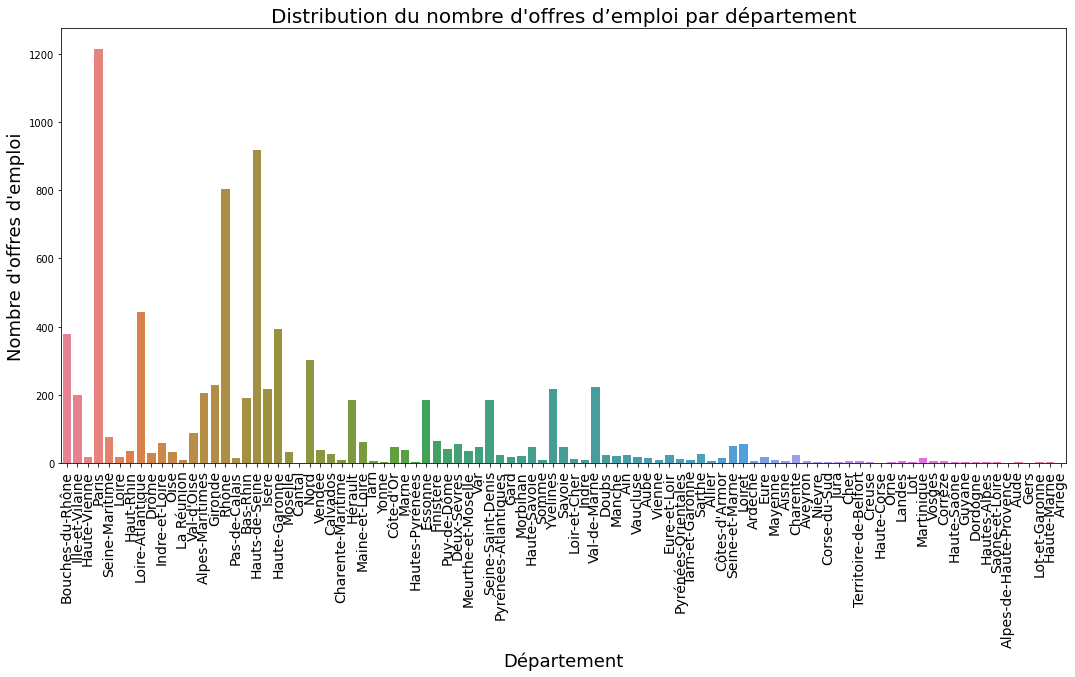

In [78]:
plt.figure(figsize=(18,8))

sns.countplot(x ='departement', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par département", fontsize=20)
plt.xlabel('Département', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

<ipython-input-79-bc0c90887015>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




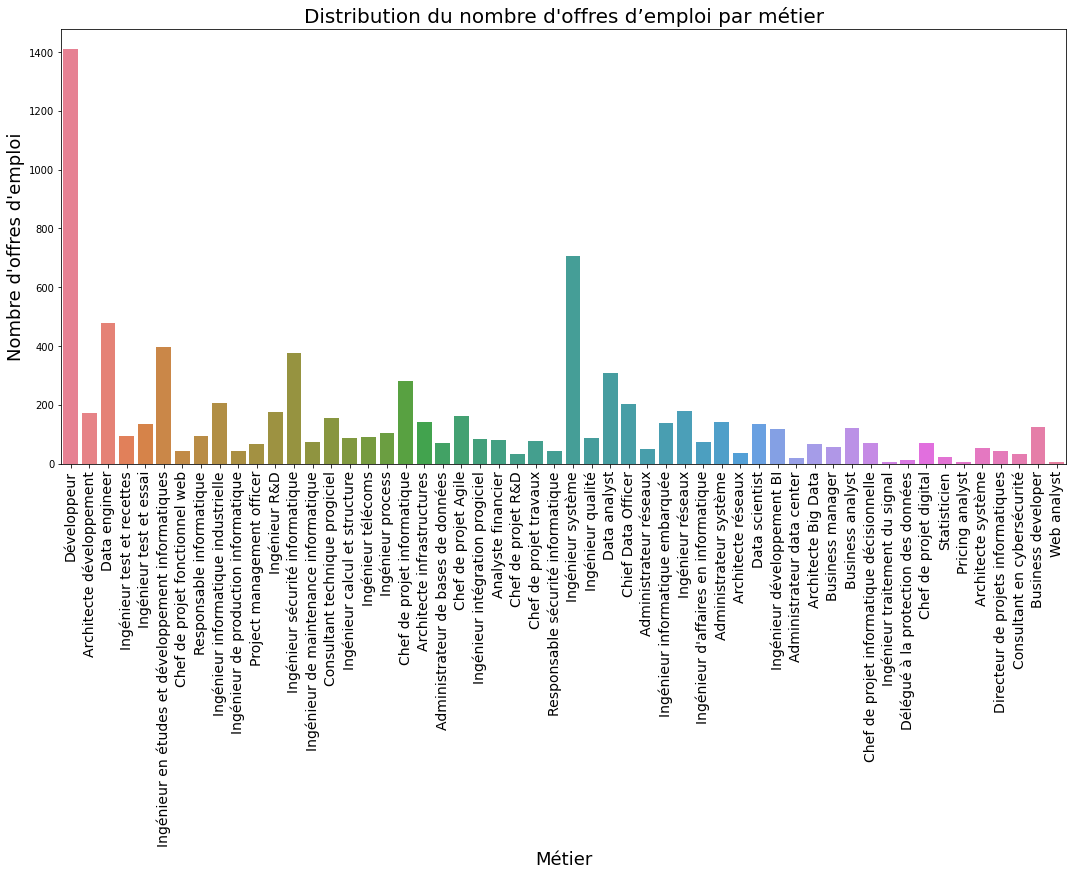

In [79]:
plt.figure(figsize=(18,8))

sns.countplot(x ='metier', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par métier", fontsize=20)
plt.xlabel('Métier', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

# On doit bien nettoyer cette colonne (on peut faire aprés un pie au lieu d'un hist)

<ipython-input-80-78c1d7fc4a93>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




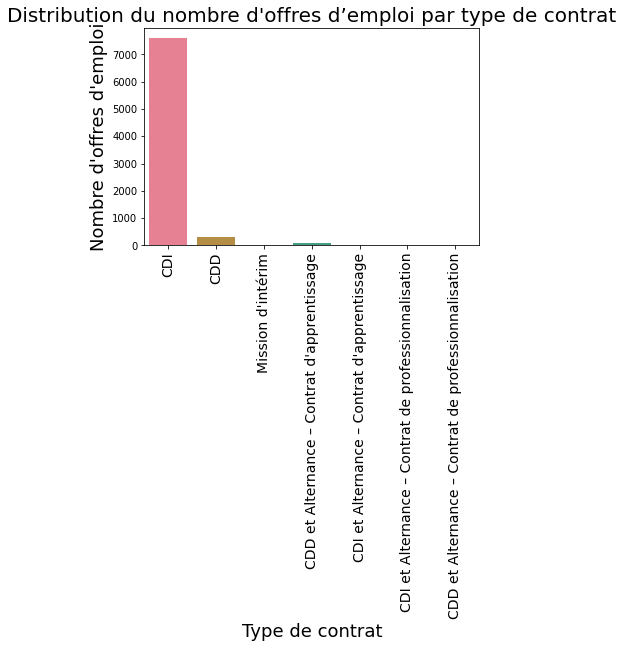

In [80]:
#plt.figure(figsize=(15,4))

sns.countplot(x ='type_contrat', data = df , palette='husl')
plt.title("Distribution du nombre d'offres d’emploi par type de contrat", fontsize=20)
plt.xlabel('Type de contrat', fontsize=18)
plt.ylabel("Nombre d'offres d'emploi", fontsize=18)
plt.xticks(fontsize=14, rotation=90)

plt.show()

In [81]:
# # Calculer le nombre d'offres d'emploi par département
# counts = df['type_contrat'].value_counts()

# # Définir une palette de couleurs personnalisée
# colors = sns.color_palette('pastel')

# # Création du pie chart avec des couleurs personnalisées
# #plt.figure(figsize=(10, 10))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title("Répartition du nombre d'offres d’emploi par département")
# plt.axis('equal')  # Assure que le pie chart est dessiné sous forme de cercle
# plt.show()

In [82]:
moyenne_salaires = df.groupby('departement')['salaire'].mean().reset_index()
moyenne_salaires

departement    salaire
0                       Ain  44.107143
1                     Aisne  41.333333
2                    Allier  38.833333
3           Alpes-Maritimes  43.045455
4   Alpes-de-Haute-Provence  46.206720
..                      ...        ...
90                   Vendée  42.477273
91                   Vienne  45.300000
92                   Vosges  43.500000
93                    Yonne  46.206720
94                 Yvelines  48.108108

[95 rows x 2 columns]

Regarder apres la distribution des salire par type de métier

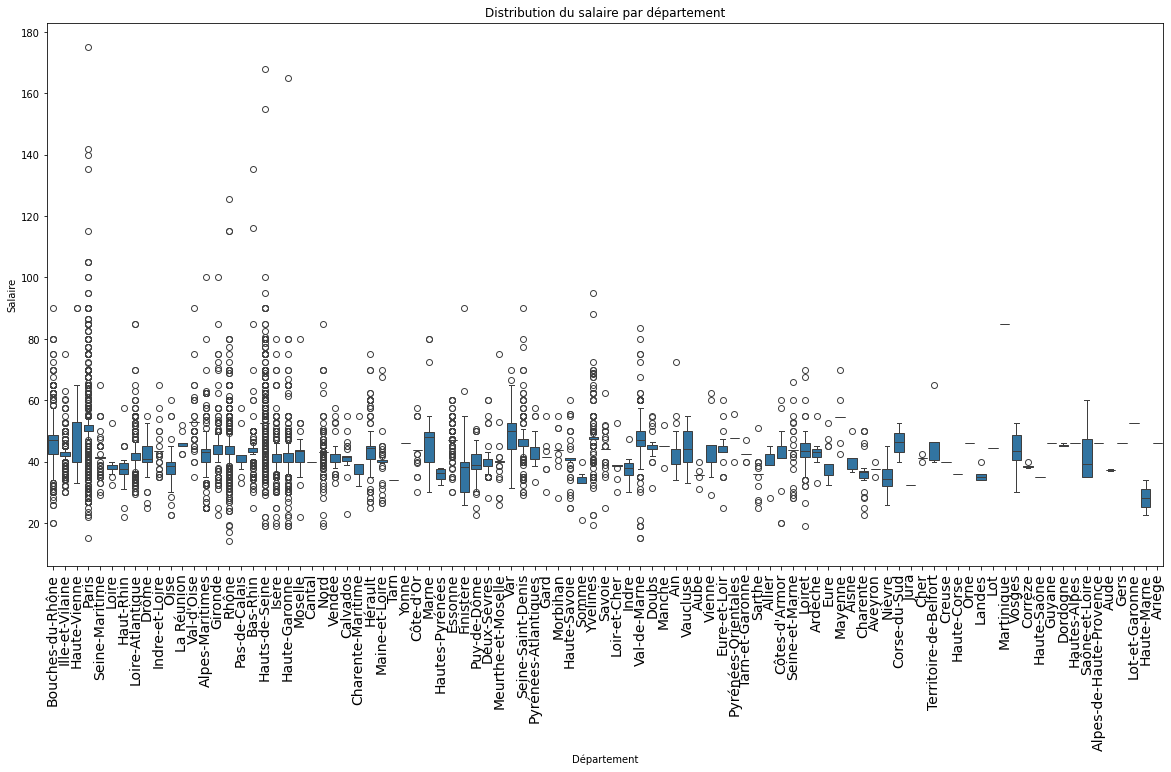

In [83]:
# Visualisation de la distribution du salaire par département avec un boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='departement', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

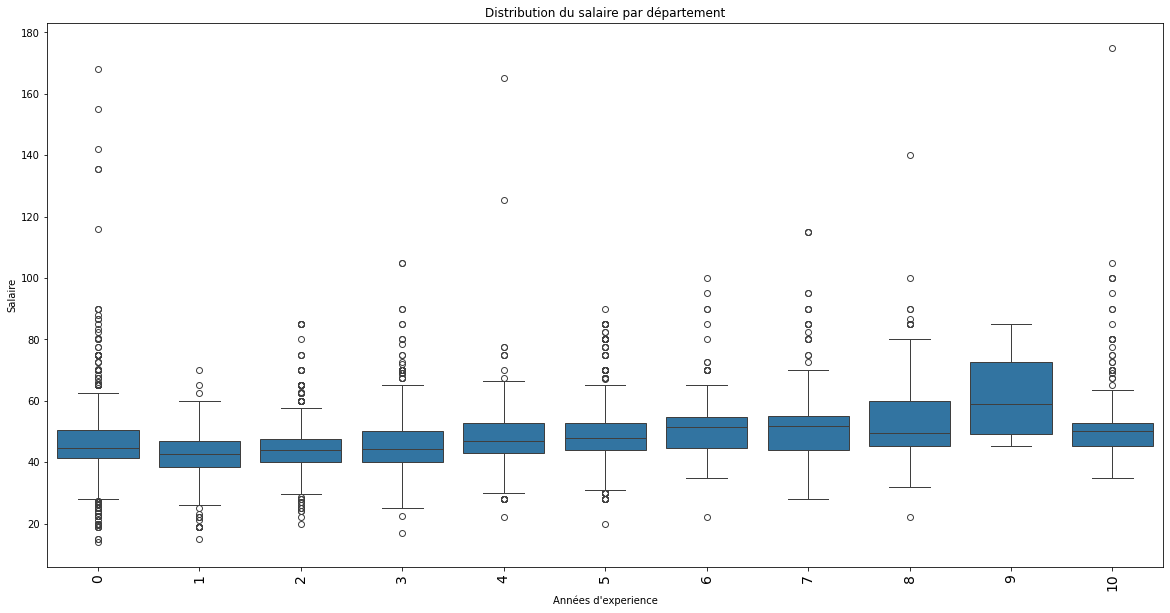

In [84]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Distribution du salaire par département')
plt.xlabel('Années d\'experience')
plt.ylabel('Salaire')
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [85]:
df['Date'] = pd.to_datetime(df['date_publication'], format='%Y-%m-%d')
df['Mois_Annee'] = df['Date'].dt.strftime('%Y-%m')

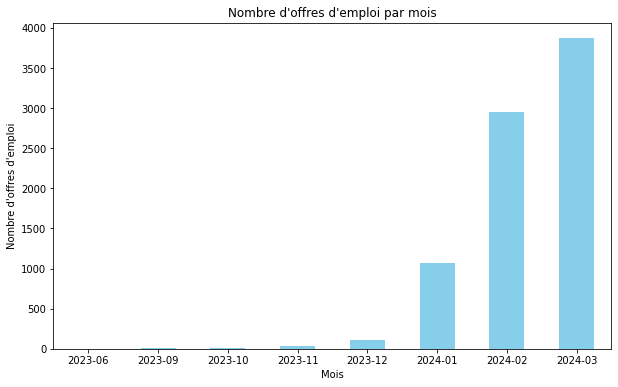

In [86]:

offres_par_mois = df['Mois_Annee'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
offres_par_mois.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'offres d\'emploi par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.xticks(rotation=0)
plt.show()

In [87]:
len(df['entreprise'].unique())

2196

### Occurrences des langues dans les données

<ipython-input-88-fbfd145d93ad>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




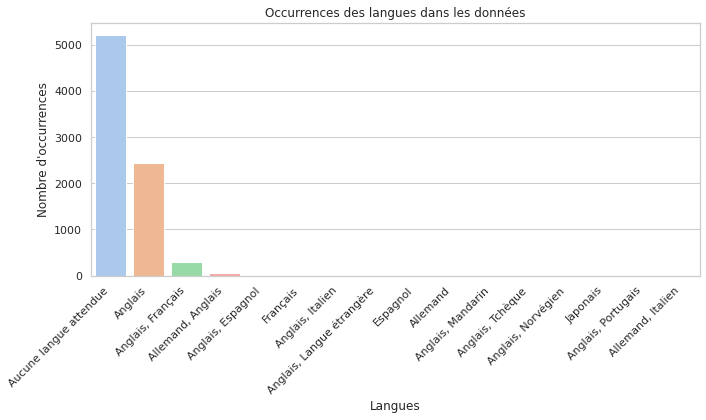

In [88]:
# Supposons que 'langue_counts' contient les comptes par langue
langue_counts = df['langues'].value_counts()

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=langue_counts.index, y=langue_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des langues dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Déplacement :

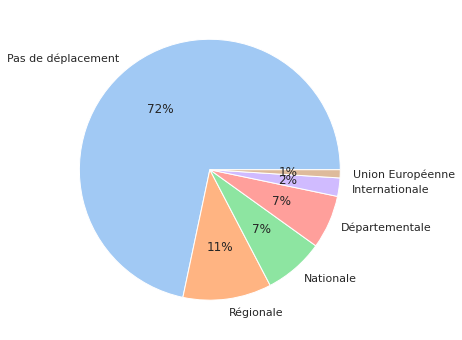

In [89]:
zone_counts = df['zone_de_deplacement'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))

#create pie chart
plt.pie(zone_counts.values, labels = zone_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

## Télétravail :

<ipython-input-90-54952ac383bc>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




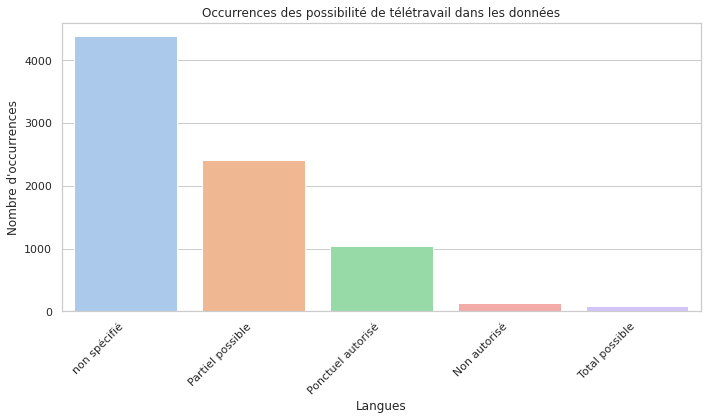

In [90]:
teletravail_counts = df['Teletravail'].value_counts()


# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=teletravail_counts.index, y=teletravail_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des possibilité de télétravail dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Experience :

<Axes: ylabel='experience'>

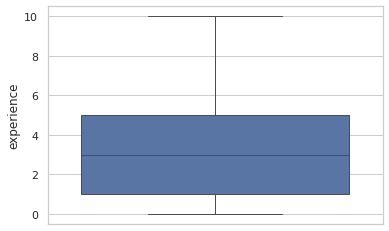

In [91]:
sns.boxplot(data=df['experience'])

In [92]:
df

entreprise type_contrat  \
0                     MICHAEL PAGE INTERNATIONAL FRANCE          CDI   
1                                   Charlotte Drahy sas          CDI   
2                                                 LOEMA          CDI   
3                                                 CELAD          CDI   
4                                          EASY PARTNER          CDI   
...                                                 ...          ...   
8037                                              Seyos          CDI   
8038                                       LES COLETTES          CDI   
8039                      Armée de l'Air et de l'Espace          CDD   
8040                      Armée de l'Air et de l'Espace          CDD   
8041  Centre Hospitalier Intercommunal des Vallées d...          CDD   

     date_publication date_mise_a_jour   salaire    prise_de_poste  \
0          2024-02-29       2024-02-29  40.00000  Dès que possible   
1          2024-01-17       2024-03-15  40.00000  Dès que possible   
2          2024-02-22       2024-02-22  47.50000  Dès que possible   
3          2024-02-29       2024-02-29  36.00000  Dès que possible   
4          2024-03-01       2024-03-01  40.00000  Dès que possible   
...               ...              ...       ...               ...   
8037       2024-03-15       2024-03-15  52.50000  Dès que possible   
8038       2024-03-12       2024-03-12  52.50000  Dès que possible   
8039       2024-02-21       2024-02-21  34.00000  Dès que possible   
8040       2024-02-16       2024-02-16  22.50000  Dès que possible   
8041       2024-02-19       2024-02-19  46.20672  Dès que possible   

      experience                             metier  \
0              0                        Développeur   
1              5                        Développeur   
2              4                        Développeur   
3              1                        Développeur   
4              3                        Développeur   
...          ...                                ...   
8037           5                 Business developer   
8038           2         Ingénieur test et recettes   
8039           0        Consultant en cybersécurité   
8040           0  Responsable sécurité informatique   
8041           3             Administrateur système   

                       statut_du_poste zone_de_deplacement  ...  \
0               Cadre du secteur privé  Pas de déplacement  ...   
1               Cadre du secteur privé           Nationale  ...   
2               Cadre du secteur privé  Pas de déplacement  ...   
3               Cadre du secteur privé  Pas de déplacement  ...   
4               Cadre du secteur privé  Pas de déplacement  ...   
...                                ...                 ...  ...   
8037            Cadre du secteur privé  Pas de déplacement  ...   
8038            Cadre du secteur privé  Pas de déplacement  ...   
8039  Cadre du secteur public / Armées           Nationale  ...   
8040  Cadre du secteur public / Armées           Nationale  ...   
8041    Agent de maîtrise / Technicien  Pas de déplacement  ...   

                                            savoir_etre  \
0     ['Autonomie', "Capacité d'analyse", 'Capacité ...   
1          ["Esprit d'équipe", 'Motivation', 'Rigueur']   
2                    ['Curiosité', 'Goût du challenge']   
3     ['Autonomie', 'Force de proposition', 'Qualité...   
4     ['Ambition', 'Autonomie', 'Bienveillance', 'Ca...   
...                                                 ...   
8037            ['Force de proposition', 'Proactivité']   
8038                                ["Esprit d'équipe"]   
8039  ["Capacité d'adaptation", 'Capacité de communi...   
8040  ["Capacité d'adaptation", 'Capacité de communi...   
8041  ['Ambition', "Capacité d'adaptation", 'Disponi...   

                                           savoir_faire  \
0     ['Application Web', 'Développement web', 'Info...   
1     ['Analyse des besoins', 'Analyse fonctio

## Entreprise : 

<ipython-input-93-20c8ba042b74>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




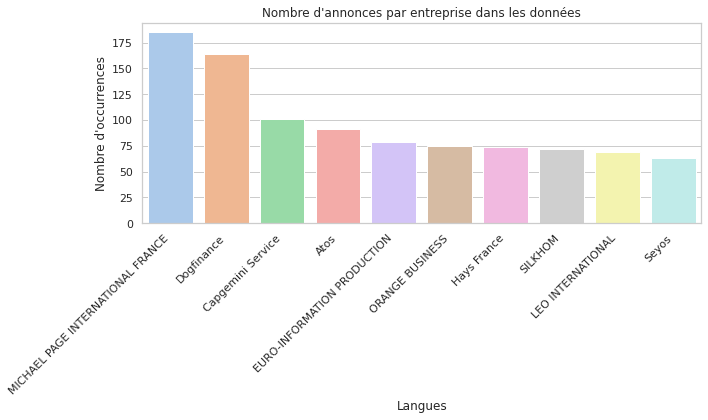

In [93]:
entreprise_counts = df['entreprise'].value_counts()[:10]
# print(entreprise_counts)

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=entreprise_counts.index, y=entreprise_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'annonces par entreprise dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

<Axes: xlabel='metier'>

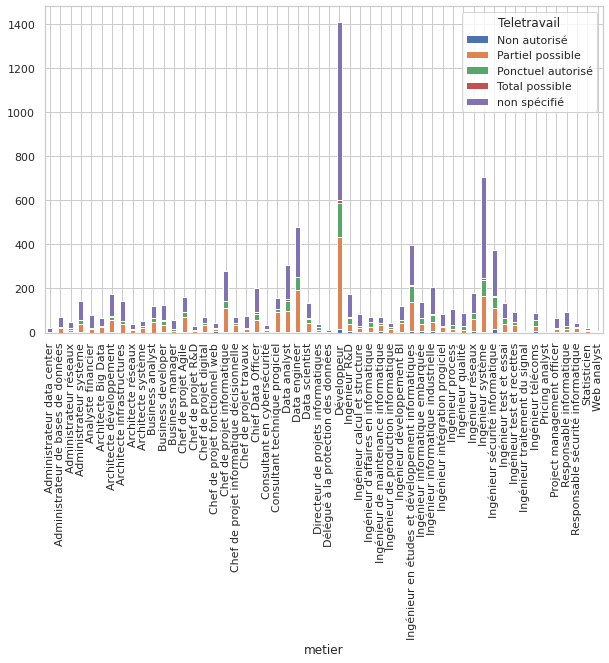

In [94]:
# Analyse de la relation entre le type de contrat et le département => Pas trés interessants 
contingency_table = pd.crosstab(df['metier'], df['Teletravail'])
contingency_table.plot(kind='bar', stacked=True,figsize=(10,6))


In [95]:
# from wordcloud import WordCloud

# # Créer un nuage de mots pour les descriptions de poste
# text = ' '.join(df['descriptif_poste'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuage de mots pour les descriptions de poste')
# plt.show()

## Salaire :

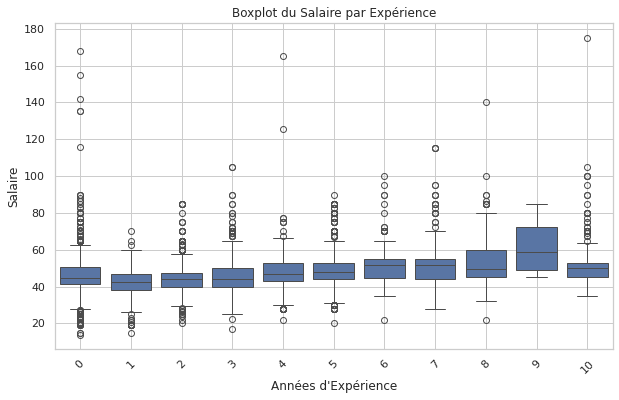

In [96]:

plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

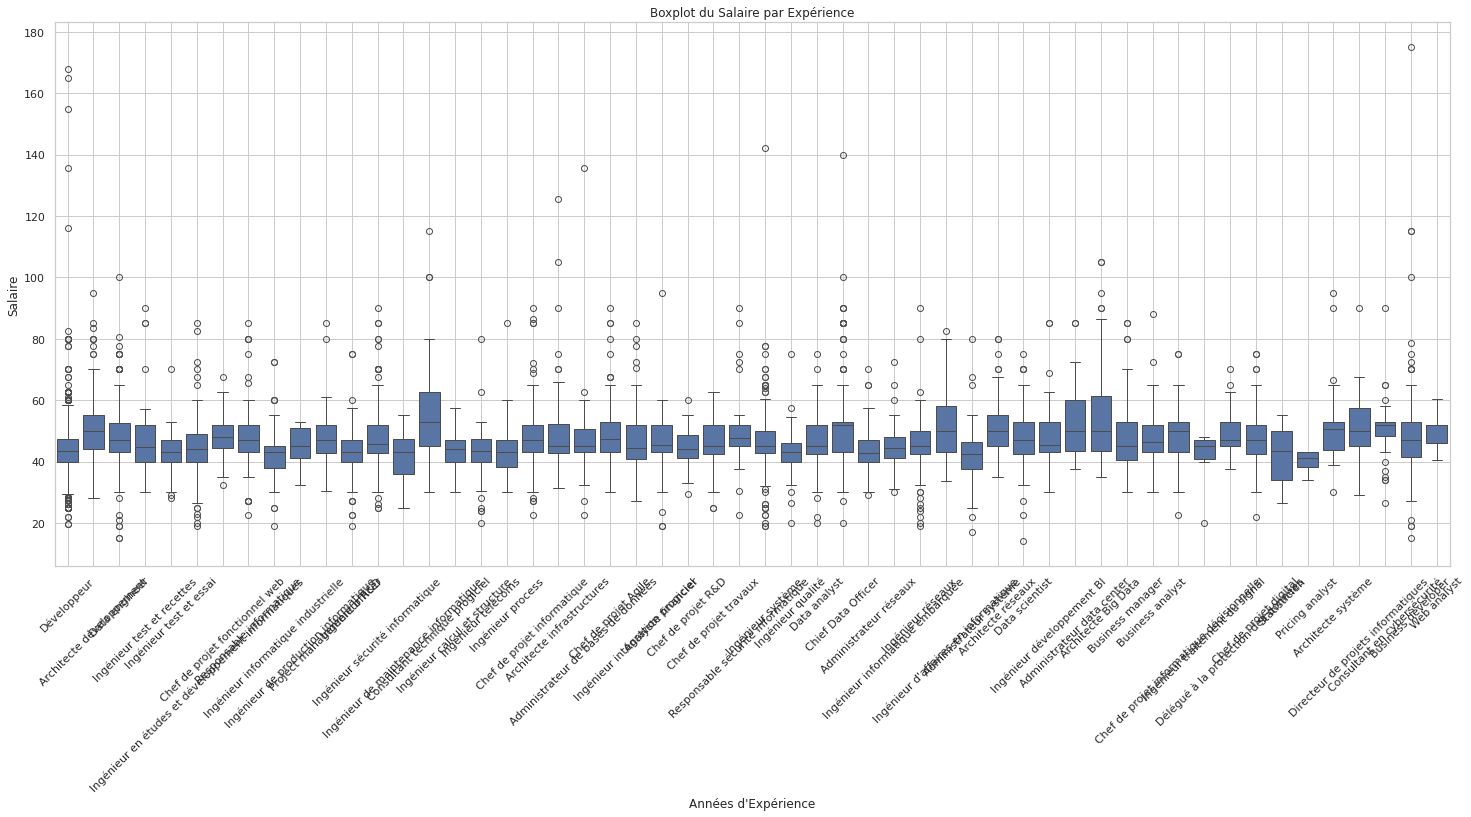

In [97]:
plt.figure(figsize=(25, 10))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='metier', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

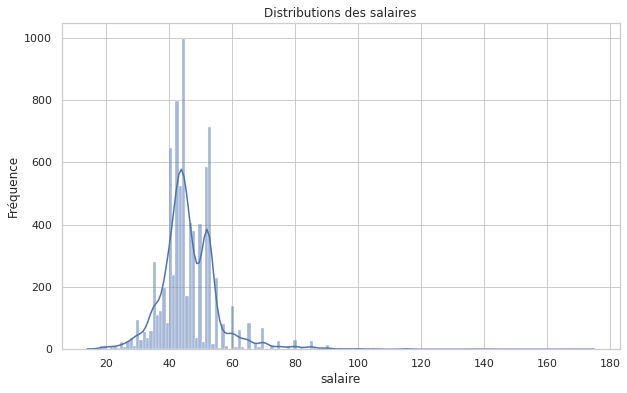

In [98]:
# Visualisation des distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['salaire'], kde=True)
plt.title('Distributions des salaires')
plt.xlabel('salaire')
plt.ylabel('Fréquence')
plt.show()


## Salaire secteur privé VS public :

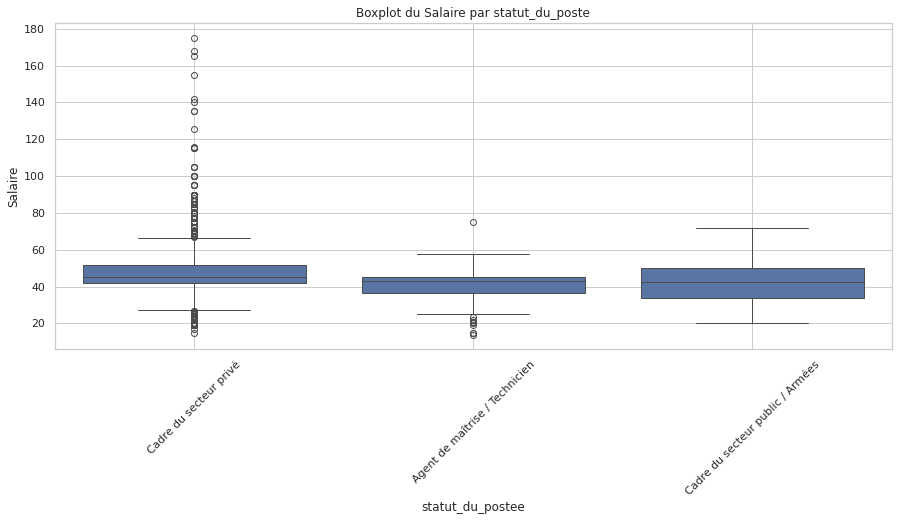

In [99]:
plt.figure(figsize=(15, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='statut_du_poste', y='salaire', data=df)
plt.title('Boxplot du Salaire par statut_du_poste')
plt.xlabel('statut_du_postee')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

# 3. Analyse de corrélation

Il faut renettoyer les colone departement de chaque dataframe à faire à la main je pense

### Analyse exploratoire des données : 


#### Colonnes numériques uniquement :

In [100]:
logement_df.columns

Index(['code_postal', 'departement',
       'Nombre de logements sociaux pour 10 000 habitants',
       'Part des logements sociaux de type individuel (en %)',
       'Part des logements sociaux de type collectif (en %)',
       'Loyer moyen par mètre carré de surface habitable (en €)'],
      dtype='object')

In [101]:
df_merged = df[["departement", "salaire","experience","nombre_posts"]].merge(df_chomage, on="departement", how="left")
df_merged = df_merged.merge(df_pop[["Superficie [en km²]"	,"Population",	"departement"]], on="departement", how="left")
df_merged = df_merged.merge(df_pauvrete[["departement","taux de pauvrete total"]], on="departement", how="left")
df_merged = df_merged.merge(logement_df[["Loyer moyen par mètre carré de surface habitable (en €)","departement"]], on="departement", how="left")
df_merged

departement   salaire  experience  nombre_posts  3ᵉ trim. 2023 (p)  \
0     Bouches-du-Rhône  40.00000           0             1                8.6   
1     Bouches-du-Rhône  40.00000           5             1                8.6   
2     Bouches-du-Rhône  47.50000           4             1                8.6   
3     Bouches-du-Rhône  36.00000           1             1                8.6   
4     Bouches-du-Rhône  40.00000           3             1                8.6   
...                ...       ...         ...           ...                ...   
8037    Lot-et-Garonne  52.50000           5             1                7.2   
8038    Lot-et-Garonne  52.50000           2             1                7.2   
8039       Haute-Marne  34.00000           0             1                6.8   
8040       Haute-Marne  22.50000           0             1                6.8   
8041            Ariège  46.20672           3             1                9.6   

      2ᵉ trim. 2023  3ᵉ trim. 2022  Superficie [en km²]  Population  \
0               8.5            8.7                 5087     1906000   
1               8.5            8.7                 5087     1906000   
2               8.5            8.7                 5087     1906000   
3               8.5            8.7                 5087     1906000   
4               8.5            8.7                 5087     1906000   
...             ...            ...                  ...         ...   
8037            7.1            7.4                 5361      305380   
8038            7.1            7.4                 5361      305380   
8039            6.4            6.3                 6211      186500   
8040            6.4            6.3                 6211      186500   
8041            9.3            9.4                 4890      137205   

      taux de pauvrete total  \
0                       18.5   
1                       18.5   
2                       18.5   
3                       18.5   
4                       18.5   
...                      ...   
8037                    17.7   
8038                    17.7   
8039                    15.3   
8040                    15.3   
8041                    19.0   

      Loyer moyen par mètre carré de surface habitable (en €)  
0                                                  6.21        
1                                                  6.21        
2                                                  6.21        
3                                                  6.21        
4                                                  6.21        
...                                                 ...        
8037                                               5.40        
8038                                               5.40        
8039                                               5.25        
8040                                               5.25        
8041                                               5.29        

[8042 rows x 11 columns]

In [102]:
df_merged.dtypes

departement                                                 object
salaire                                                    float64
experience                                                   int64
nombre_posts                                                 int64
3ᵉ trim. 2023 (p)                                          float64
2ᵉ trim. 2023                                              float64
3ᵉ trim. 2022                                              float64
Superficie [en km²]                                          int64
Population                                                   int64
taux de pauvrete total                                     float64
Loyer moyen par mètre carré de surface habitable (en €)    float64
dtype: object

In [103]:

df_merged.describe()

salaire   experience  nombre_posts  3ᵉ trim. 2023 (p)  \
count  8042.000000  8042.000000   8042.000000        8042.000000   
mean     46.433557     2.868068      1.109177           6.791806   
std       9.803349     2.234678      0.617707           1.416858   
min      14.000000     0.000000      1.000000           4.300000   
25%      41.500000     1.000000      1.000000           5.700000   
50%      45.000000     3.000000      1.000000           6.400000   
75%      51.912977     5.000000      1.000000           7.300000   
max     175.000000    10.000000     10.000000          20.200000   

       2ᵉ trim. 2023  3ᵉ trim. 2022  Superficie [en km²]    Population  \
count    8042.000000    8042.000000          8042.000000  8.042000e+03   
mean        6.622084       6.663492          3790.116265  1.408371e+06   
std         1.373636       1.358877          3215.889524  5.518742e+05   
min         4.100000       4.100000           105.000000  1.185930e+05   
25%         5.600000       5.700000           176.000000  1.070000e+06   
50%         6.300000       6.200000          4299.000000  1.395000e+06   
75%         7.000000       7.300000          6309.000000  1.667500e+06   
max        18.600000      17.600000         86504.000000  2.577000e+06   

       taux de pauvrete total  \
count             8040.000000   
mean                14.706430   
std                  3.418541   
min                  9.100000   
25%                 12.400000   
50%                 14.800000   
75%                 15.600000   
max                 36.100000   

       Loyer moyen par mètre carré de surface habitable (en €)  
count                                        8042.000000        
mean                                            6.799225        
std                                             0.952616        
min                                             4.740000        
25%                                             6.190000        
50%                                             6.510000        
75%                                             7.550000        
max                                             8.600000

### Coorelation des variables :

In [104]:
sns . pairplot ( df_merged )
g = sns . PairGrid ( df_merged ) # more flexible
g . map_upper ( sns . histplot )
g . map_lower ( sns . kdeplot , fill = True )
g . map_diag ( sns . histplot , kde = True )

KeyboardInterrupt: 

### Correlation salaire experience:

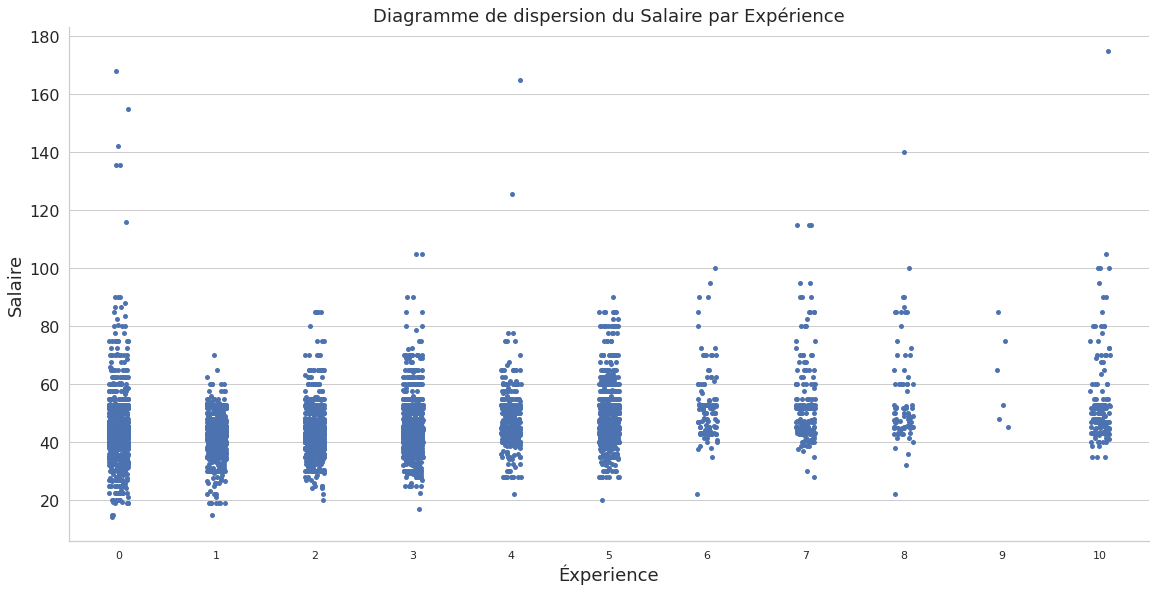

In [ ]:
sns.catplot( data = df_merged , x ="experience", y ="salaire",height=8, aspect=2)
# Add a title
plt.title("Diagramme de dispersion du Salaire par Expérience",fontsize = 18)
# Show the plot


plt.yticks(fontsize = 16)
plt.xlabel("Éxperience", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

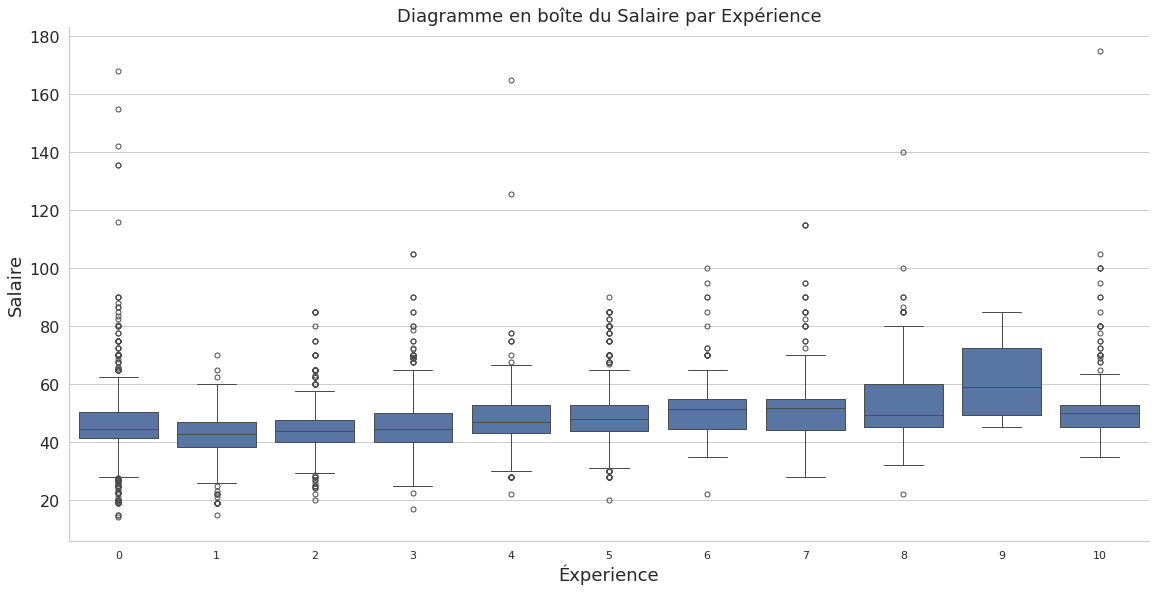

In [ ]:
sns.catplot( data = df_merged , x ="experience", y ="salaire", kind ="box",height=8, aspect=2)
# Add a title
plt.title("Diagramme en boîte du Salaire par Expérience",fontsize = 18)
# Show the plot


plt.yticks(fontsize = 16)
plt.xlabel("Éxperience", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

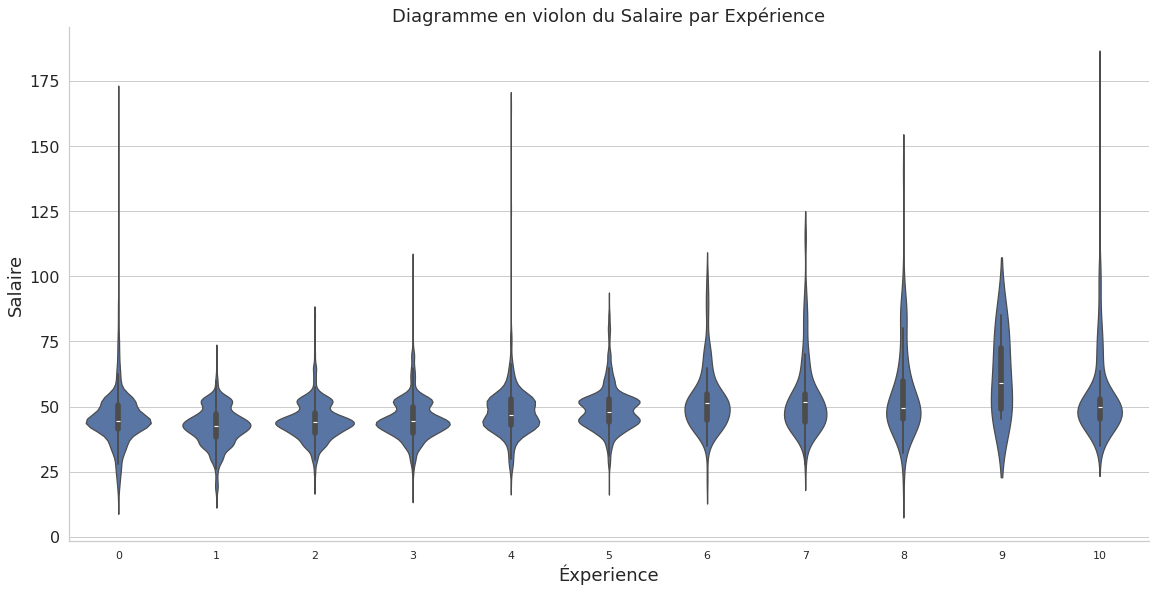

In [ ]:
sns.catplot( data = df_merged , x ="experience", y ="salaire",height=8, aspect=2,kind="violin")
# Add a title
plt.title("Diagramme en violon du Salaire par Expérience",fontsize = 18)
# Show the plot


plt.yticks(fontsize = 16)
plt.xlabel("Éxperience", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

### Correlation salaire et departement :

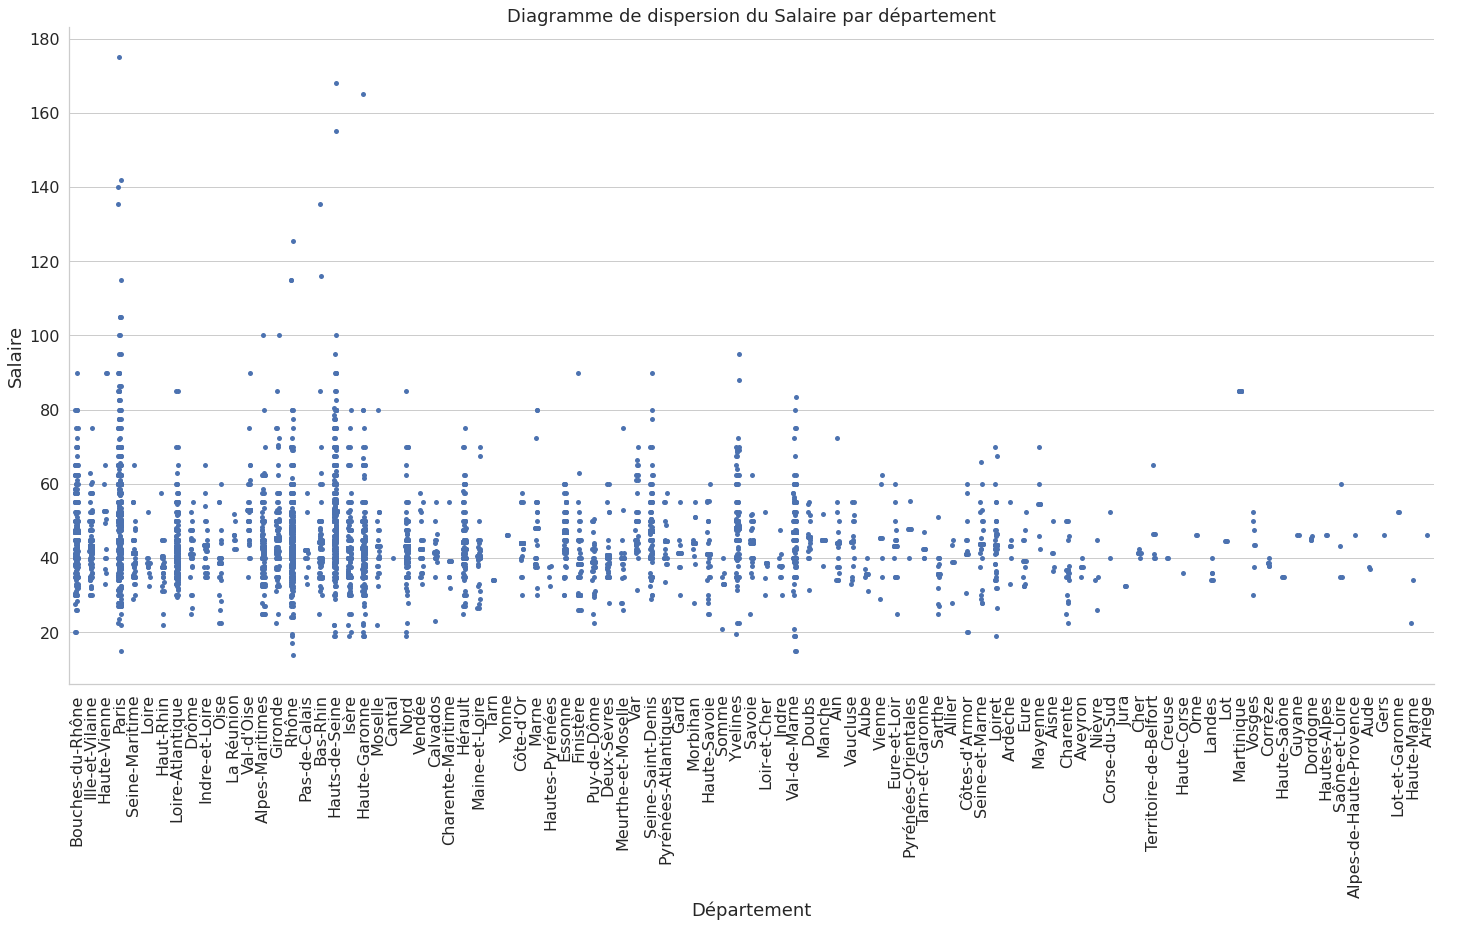

In [ ]:
sns . catplot ( data = df_merged , x ="departement", y ="salaire" ,height=10, aspect=2)
plt.title("Diagramme de dispersion du Salaire par département",fontsize = 18)
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Département", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

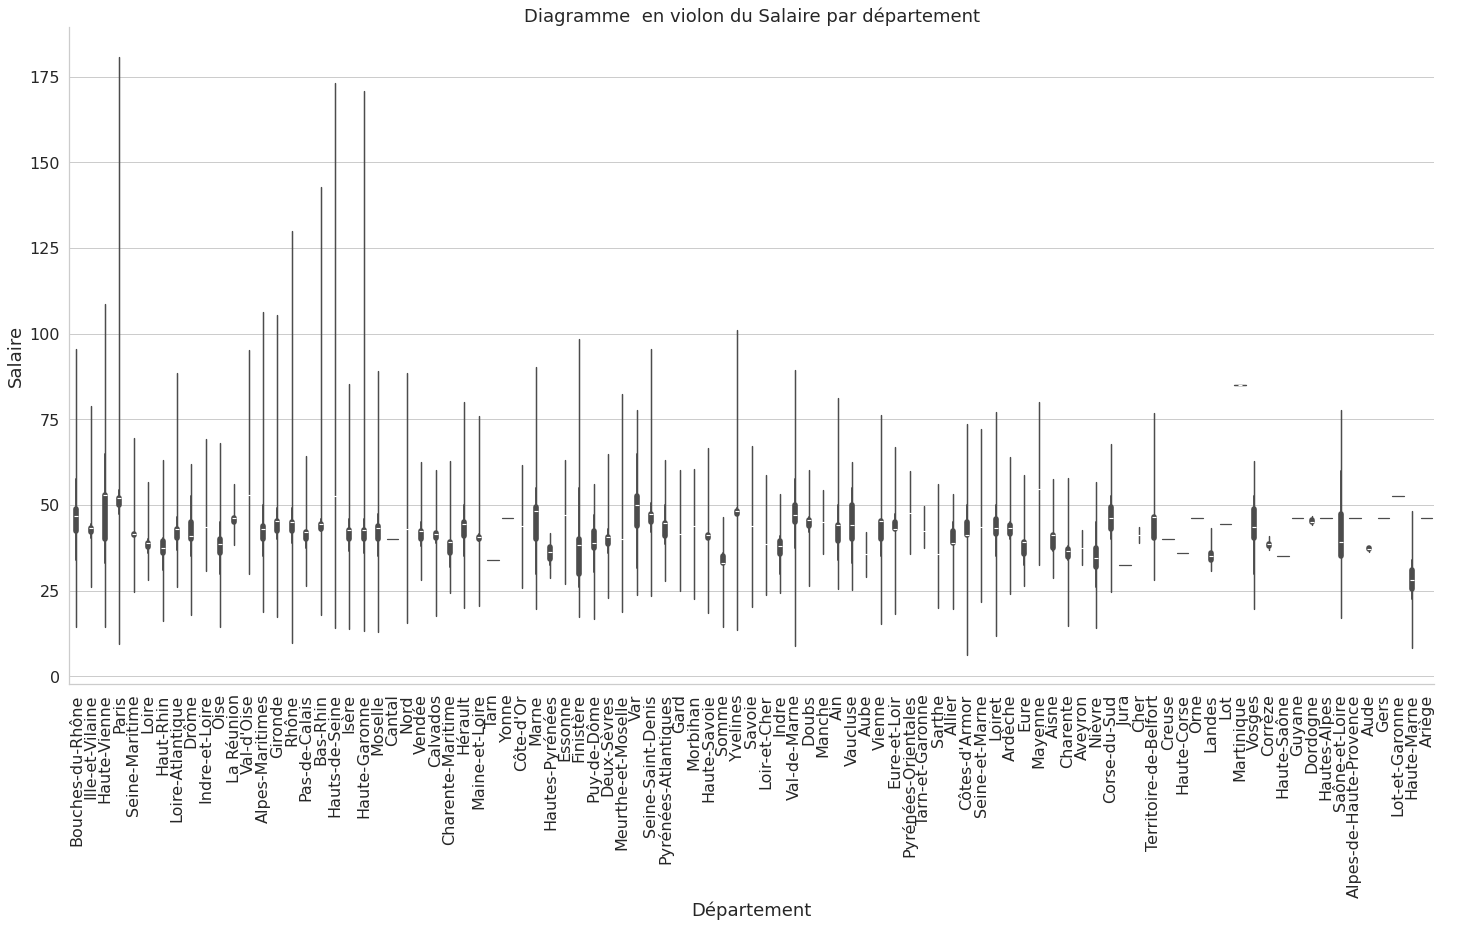

In [ ]:
sns . catplot ( data = df_merged , x ="departement", y ="salaire" ,height=10, aspect=2,kind="violin")
plt.title("Diagramme  en violon du Salaire par département",fontsize = 18)
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Département", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

* ##  *    ==> Présence de beaucoup d'outlyers ! 

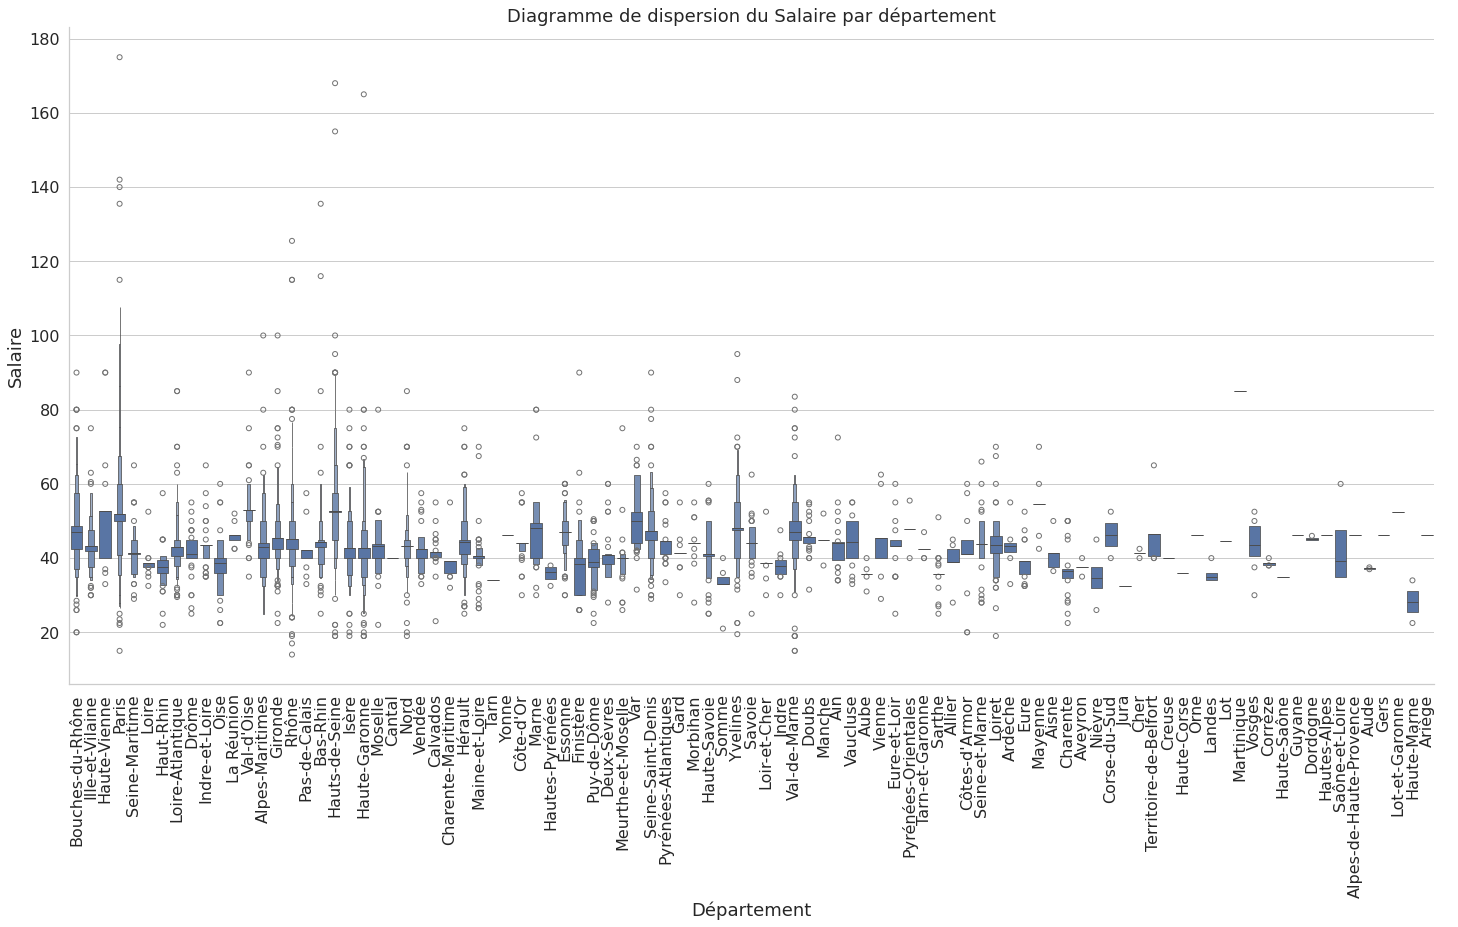

In [ ]:

sns . catplot ( data = df_merged , x ="departement", y ="salaire" ,height=10, aspect=2,kind ="boxen")
plt.title("Diagramme de dispersion du Salaire par département",fontsize = 18)
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Département", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

In [ ]:
# # Charger vos données
# data = pd.read_csv("votre_fichier.csv")

# # Supprimer les colonnes non numériques si nécessaire
# data_numeric = data.select_dtypes(include=['number'])

# # Créer l'objet AFC
# mca = MCA(n_components=2)

# # Ajuster l'AFC aux données
# mca.fit(data_numeric)

# # Visualiser les résultats
# mca.plot_coordinates(data_numeric, ax=None)

# # Afficher le graphique
# plt.show()

#### Données numérqiues et catégorilles :

In [ ]:
df["secteur_d_activite"].unique

<bound method Series.unique of 0       ACCUEIL OU ACCOMPAGNEMENT SANS HÉBERGEMENT D'A...
1          CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES
2         CONSEIL EN RELATIONS PUBLIQUES ET COMMUNICATION
3          CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES
4       CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...
                              ...                        
8037    LOCATION ET LOCATION-BAIL D'AUTRES MACHINES, É...
8038    CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...
8039                                              DÉFENSE
8040                                              DÉFENSE
8041                              ACTIVITÉS HOSPITALIÈRES
Name: secteur_d_activite, Length: 8042, dtype: object>

*       Attribut pas du tout pertinent au vu du nombre de valeurs possibles .

In [ ]:
df.columns

Index(['entreprise', 'type_contrat', 'date_publication', 'date_mise_a_jour',
       'salaire', 'prise_de_poste', 'experience', 'metier', 'statut_du_poste',
       'zone_de_deplacement', 'secteur_d_activite', 'Teletravail',
       'descriptif_poste', 'profil_recherche', 'langues', 'savoir_etre',
       'savoir_faire', 'descriptif_entreprise', 'nombre_posts', 'duree',
       'ville', 'code_postal', 'departement', 'Date', 'Mois_Annee'],
      dtype='object')

In [ ]:


df_merged_with_categoril_attributes = df[["departement", "salaire","experience","nombre_posts","entreprise", "type_contrat","metier","statut_du_poste","zone_de_deplacement","Teletravail"]].merge(df_chomage, on="departement", how="left")
df_merged_with_categoril_attributes = df_merged_with_categoril_attributes.merge(df_pop[["Superficie [en km²]"	,"Population",	"departement"]], on="departement", how="left")
df_merged_with_categoril_attributes = df_merged_with_categoril_attributes.merge(df_pauvrete[["departement","taux de pauvrete total"]], on="departement", how="left")
df_merged_with_categoril_attributes = df_merged_with_categoril_attributes.merge(logement_df[["Loyer moyen par mètre carré de surface habitable (en €)","departement"]], on="departement", how="left")
df_merged_with_categoril_attributes

departement   salaire  experience  nombre_posts  \
0     Bouches-du-Rhône  40.00000           0             1   
1     Bouches-du-Rhône  40.00000           5             1   
2     Bouches-du-Rhône  47.50000           4             1   
3     Bouches-du-Rhône  36.00000           1             1   
4     Bouches-du-Rhône  40.00000           3             1   
...                ...       ...         ...           ...   
8037    Lot-et-Garonne  52.50000           5             1   
8038    Lot-et-Garonne  52.50000           2             1   
8039       Haute-Marne  34.00000           0             1   
8040       Haute-Marne  22.50000           0             1   
8041            Ariège  46.20672           3             1   

                                             entreprise type_contrat  \
0                     MICHAEL PAGE INTERNATIONAL FRANCE          CDI   
1                                   Charlotte Drahy sas          CDI   
2                                                 LOEMA          CDI   
3                                                 CELAD          CDI   
4                                          EASY PARTNER          CDI   
...                                                 ...          ...   
8037                                              Seyos          CDI   
8038                                       LES COLETTES          CDI   
8039                      Armée de l'Air et de l'Espace          CDD   
8040                      Armée de l'Air et de l'Espace          CDD   
8041  Centre Hospitalier Intercommunal des Vallées d...          CDD   

                                 metier                   statut_du_poste  \
0                           Développeur            Cadre du secteur privé   
1                           Développeur            Cadre du secteur privé   
2                           Développeur            Cadre du secteur privé   
3                           Développeur            Cadre du secteur privé   
4                           Développeur            Cadre du secteur privé   
...                                 ...                               ...   
8037                 Business developer            Cadre du secteur privé   
8038         Ingénieur test et recettes            Cadre du secteur privé   
8039        Consultant en cybersécurité  Cadre du secteur public / Armées   
8040  Responsable sécurité informatique  Cadre du secteur public / Armées   
8041             Administrateur système    Agent de maîtrise / Technicien   

     zone_de_deplacement        Teletravail  3ᵉ trim. 2023 (p)  2ᵉ trim. 2023  \
0     Pas de déplacement       non spécifié                8.6            8.5   
1              Nationale   Partiel possible                8.6            8.5   
2     Pas de déplacement  Ponctuel autorisé                8.6            8.5   
3     Pas de déplacement       non spécifié                8.6            8.5   
4     Pas de déplacement     Total possible                8.6            8.5   
...                  ...                ...                ...            ...   
8037  Pas de déplacement   Partiel possible                7.2            7.1   
8038  Pas de déplacement       non spécifié                7.2            7.1   
8039           Nationale       non spécifié                6.8            6.4   
8040           Nationale       non spécifié                6.8            6.4   
8041  Pas de déplacement       non spécifié                9.6            9.3   

      3ᵉ trim. 2022  Superficie [en km²]  Population  taux de pauvrete total  \
0               8.7                 5087     1906000                    18.5   
1               8.7                 5087     1906000                    18.5   
2               8.7                 5087     1906000                    18.5   
3               8.7                 5087     1906000                    18.5   
4               8.7                 5087     1906000                    18.5   
...             ...    

### distribtion des experiences selon les types des contrats :

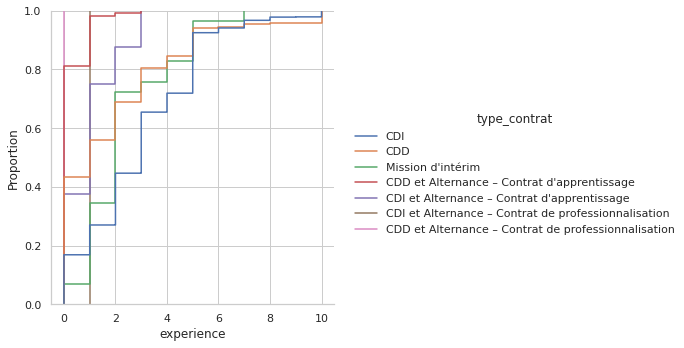

In [ ]:
sns . displot ( df_merged_with_categoril_attributes , x ="experience", hue ="type_contrat", kind ="ecdf")

*   On remarche que pour peu d année d experience demande on a plus d offre d alternace et pour plus  d'années d'éxperiences on retrpuves des CDI er CDD et pour 8 a 10 ans c'est plus des CDI

### Variation sallaire een fonction des metiers :

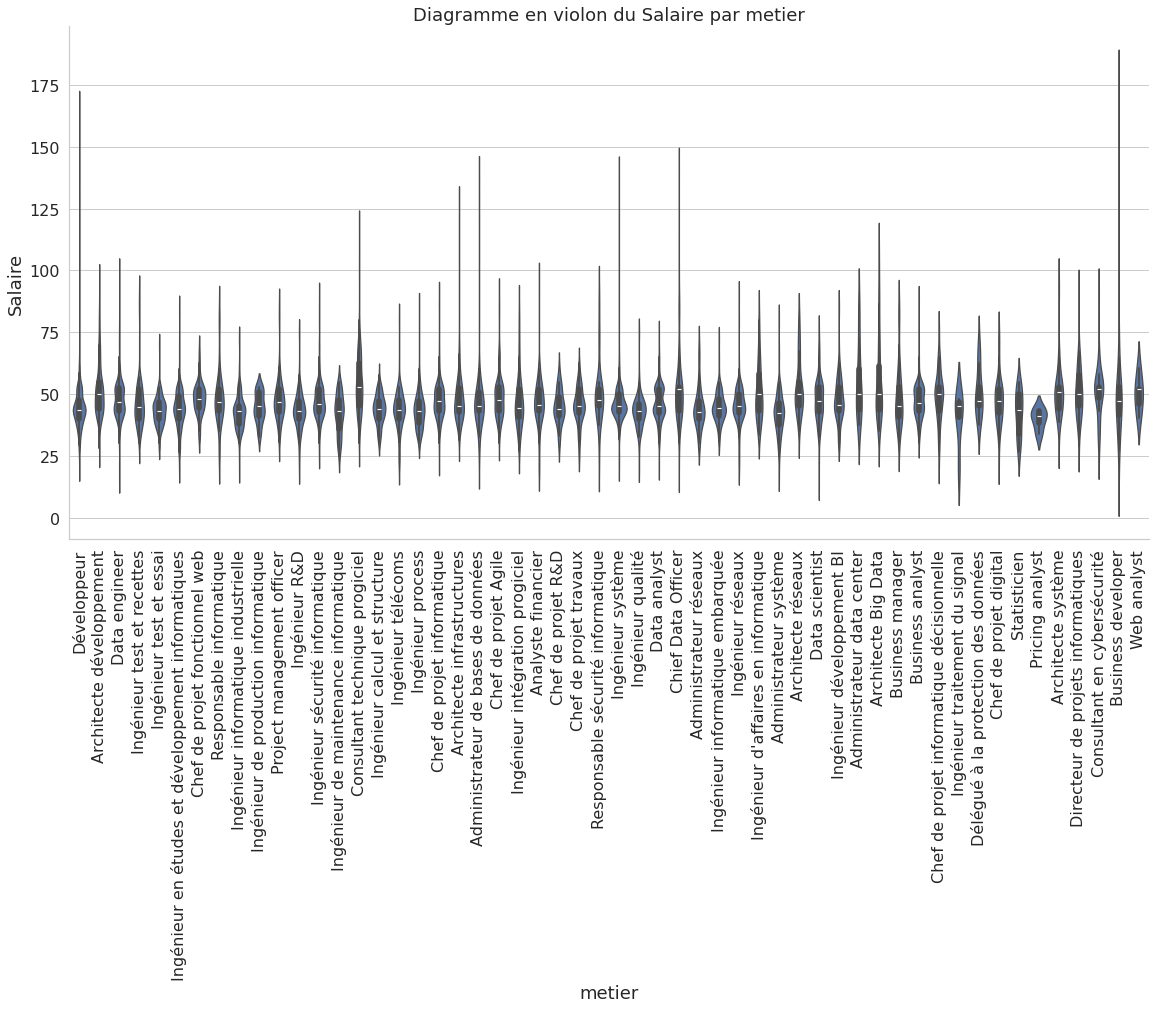

In [ ]:
sns.catplot( data = df_merged_with_categoril_attributes , x ="metier", y ="salaire",height=8, aspect=2,kind="violin")
# Add a title
plt.title("Diagramme en violon du Salaire par metier",fontsize = 18)

# Show the plot
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("metier", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

### salaire et zone de demplacement : 

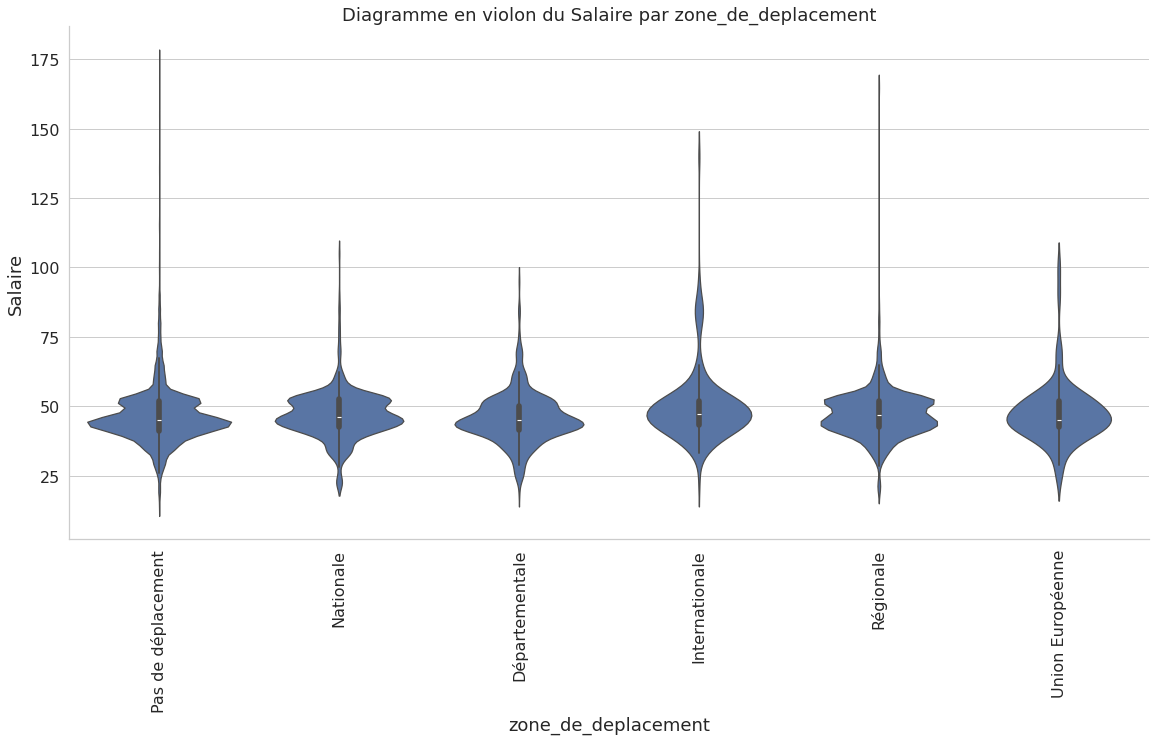

In [ ]:

sns.catplot( data = df_merged_with_categoril_attributes , x ="zone_de_deplacement", y ="salaire",height=8, aspect=2,kind="violin")
# Add a title
plt.title("Diagramme en violon du Salaire par zone_de_deplacement",fontsize = 18)

# Show the plot
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("zone_de_deplacement", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

### Salaire et télétravail :

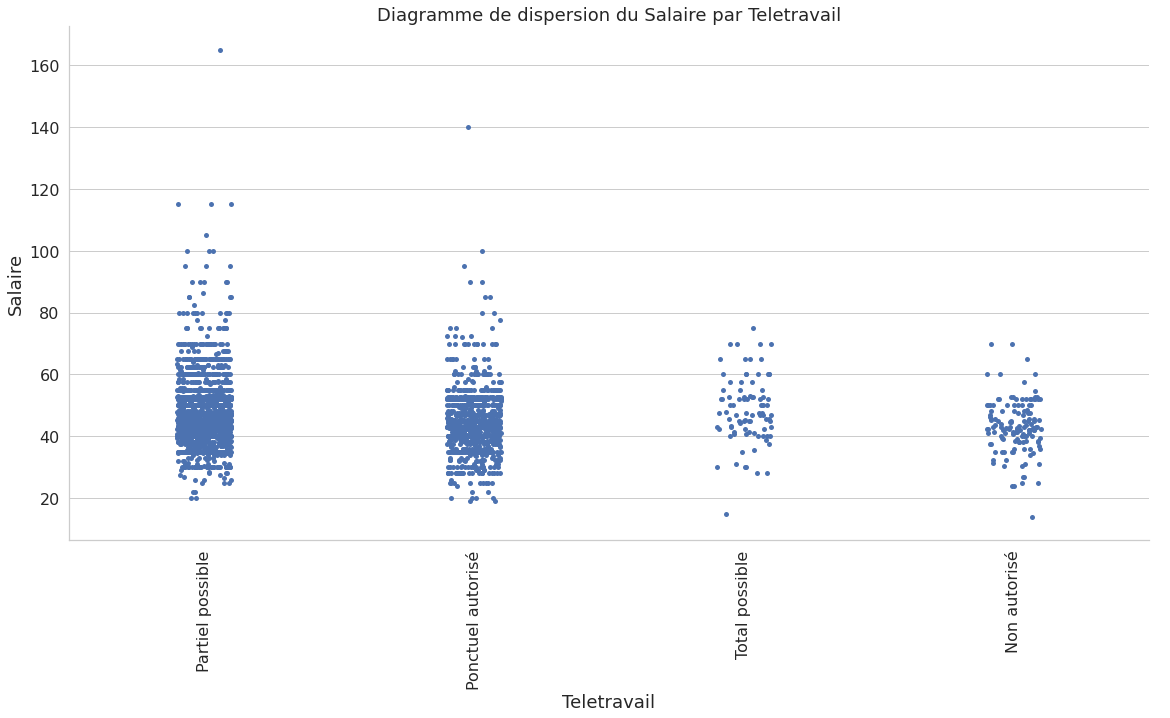

In [ ]:


sns.catplot( data = df_merged_with_categoril_attributes , x ="Teletravail", y ="salaire",height=8, aspect=2)
# Add a title
plt.title("Diagramme de dispersion du Salaire par Teletravail",fontsize = 18)

# Show the plot
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Teletravail", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

### Salaire et statut du poste : 

/home/djeghali/.local/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/djeghali/.local/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/djeghali/.local/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/djeghali/.local/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/djeghali/.local/lib/python3.8/site-packages/seaborn/categorical.py:339

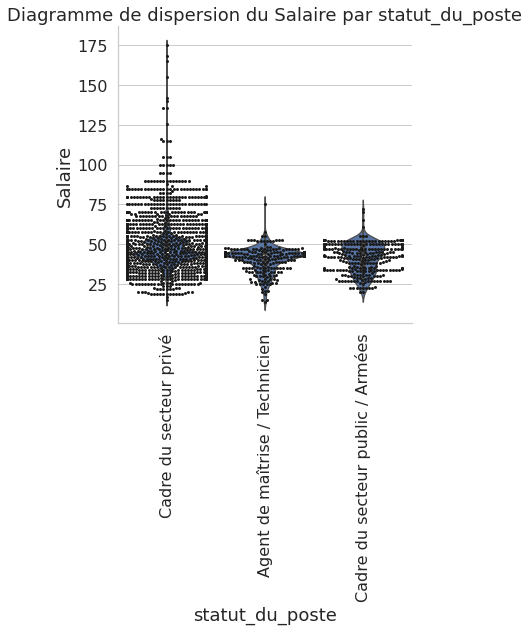

In [ ]:
g = sns . catplot ( data = df_merged_with_categoril_attributes , x ="statut_du_poste", y ="salaire",
kind ="violin")
sns . swarmplot ( data = df_merged_with_categoril_attributes , x ="statut_du_poste", y ="salaire",
color ="k", size =3 , ax = g.ax )

plt.title("Diagramme de dispersion du Salaire par statut_du_poste",fontsize = 18)

# Show the plot
plt.xticks(rotation = 'vertical',fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("statut_du_poste", fontsize=18)
plt.ylabel("Salaire", fontsize=18)


# Afficher le graphe
plt.show()

## Réduction de dimension : PCA :

#### Avec des données quantitatives :

In [ ]:
df_merged = df_merged.dropna(subset=['taux de pauvrete total'])
df_merged.isna().sum()

departement                                                0
salaire                                                    0
experience                                                 0
nombre_posts                                               0
3ᵉ trim. 2023 (p)                                          0
2ᵉ trim. 2023                                              0
3ᵉ trim. 2022                                              0
Superficie [en km²]                                        0
Population                                                 0
taux de pauvrete total                                     0
Loyer moyen par mètre carré de surface habitable (en €)    0
dtype: int64

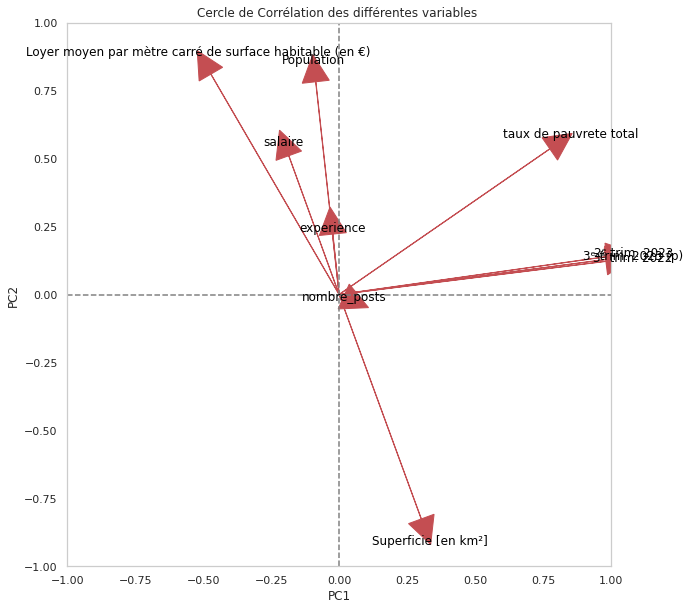

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sélectionner uniquement les variables numériques
df_numeric = df_merged.select_dtypes(include=[np.number])

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Analyse en Composantes Principales (PCA)
pca = PCA()
pca.fit(df_scaled)

# Calcul des coordonnées des vecteurs de corrélation dans l'espace des composantes principales
pcs = pca.components_
n_pcs = len(pcs)
vecteurs_correlation = pcs.T * np.sqrt(pca.explained_variance_)

# Affichage du cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Affichage des axes
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')

# Affichage des vecteurs de corrélation
for i in range(n_pcs):
    ax.arrow(0, 0, vecteurs_correlation[i, 0], vecteurs_correlation[i, 1],
             head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(vecteurs_correlation[i, 0] * 1.1, vecteurs_correlation[i, 1] * 1.1,
            df_numeric.columns[i], color='black', ha='center', va='center')

# Ajout de labels aux axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Ajout d'une grille
ax.grid()

# Affichage du cercle
ax.set_aspect('equal', 'box')
plt.title('Cercle de Corrélation des différentes variables ')
plt.show()


*        pour le chomage on avu que le taux de chomages n'a pas trop bouger on en garde que le 3 iéme trimestre qui reste tout de meme le plus proche de la periode durant laquelle nous avons scrapper nos données.

<Axes: >

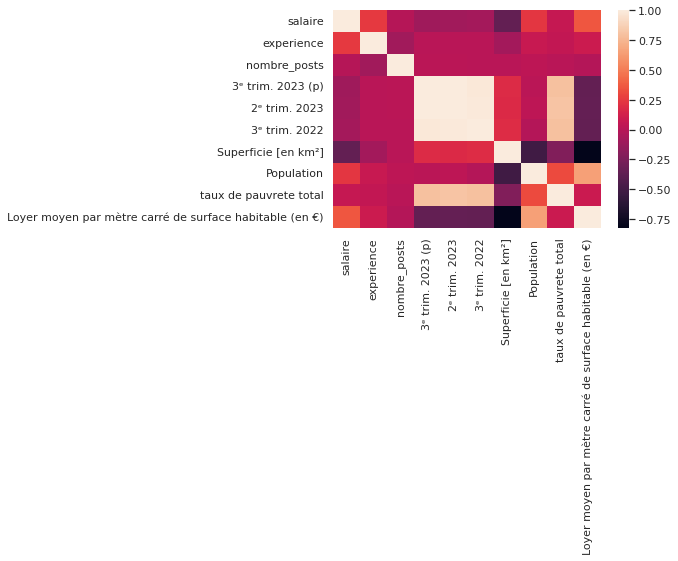

In [ ]:
corr = df_numeric.corr()
sns.heatmap(corr)

In [ ]:
df_merged.dtypes

departement                                                 object
salaire                                                    float64
experience                                                   int64
nombre_posts                                                 int64
3ᵉ trim. 2023 (p)                                          float64
2ᵉ trim. 2023                                              float64
3ᵉ trim. 2022                                              float64
Superficie [en km²]                                         object
Population                                                  object
taux de pauvrete total                                     float64
Loyer moyen par mètre carré de surface habitable (en €)    float64
dtype: object

#### Avec des données qualitatives :

##### AFC : données qualitatives :
AFC PERMET DE deduire l'association entre les modalités de deux variable qualitatives afin de de pouvoir reduire la dimension un dataset ainsi que mieux comprendre ses donnéées .

In [ ]:
df_merged_with_categoril_attributes.columns

Index(['departement', 'salaire', 'experience', 'nombre_posts', 'entreprise',
       'type_contrat', 'metier', 'nombre_posts', 'statut_du_poste',
       'zone_de_deplacement', 'Teletravail', '3ᵉ trim. 2023 (p)',
       '2ᵉ trim. 2023', '3ᵉ trim. 2022', 'Superficie [en km²]', 'Population',
       'taux de pauvrete total',
       'Loyer moyen par mètre carré de surface habitable (en €)'],
      dtype='object')

In [ ]:
df_merged_with_categoril_attributes.dtypes


departement                                                 object
salaire                                                    float64
experience                                                   int64
nombre_posts                                                 int64
entreprise                                                  object
type_contrat                                                object
metier                                                      object
nombre_posts                                                 int64
statut_du_poste                                             object
zone_de_deplacement                                         object
Teletravail                                                 object
3ᵉ trim. 2023 (p)                                          float64
2ᵉ trim. 2023                                              float64
3ᵉ trim. 2022                                              float64
Superficie [en km²]                                        flo

In [ ]:
df_merged_with_categoril_attributes.describe(include="all")

departement      salaire   experience  nombre_posts  \
count         8042  8042.000000  8042.000000   8042.000000   
unique          95          NaN          NaN           NaN   
top          Paris          NaN          NaN           NaN   
freq          1214          NaN          NaN           NaN   
mean           NaN    46.433557     2.868068      1.109177   
std            NaN     9.803349     2.234678      0.617707   
min            NaN    14.000000     0.000000      1.000000   
25%            NaN    41.500000     1.000000      1.000000   
50%            NaN    45.000000     3.000000      1.000000   
75%            NaN    51.912977     5.000000      1.000000   
max            NaN   175.000000    10.000000     10.000000   

                               entreprise type_contrat       metier  \
count                                8042         8042         8042   
unique                               2196            7           54   
top     MICHAEL PAGE INTERNATIONAL FRANCE          CDI  Développeur   
freq                                  185         7588         1409   
mean                                  NaN          NaN          NaN   
std                                   NaN          NaN          NaN   
min                                   NaN          NaN          NaN   
25%                                   NaN          NaN          NaN   
50%                                   NaN          NaN          NaN   
75%                                   NaN          NaN          NaN   
max                                   NaN          NaN          NaN   

        nombre_posts         statut_du_poste zone_de_deplacement  \
count    8042.000000                    8042                8042   
unique           NaN                       3                   6   
top              NaN  Cadre du secteur privé  Pas de déplacement   
freq             NaN                    7483                5765   
mean        1.109177                     NaN                 NaN   
std         0.617707                     NaN                 NaN   
min         1.000000                     NaN                 NaN   
25%         1.000000                     NaN                 NaN   
50%         1.000000                     NaN                 NaN   
75%         1.000000                     NaN                 NaN   
max        10.000000                     NaN                 NaN   

             Teletravail  3ᵉ trim. 2023 (p)  2ᵉ trim. 2023  3ᵉ trim. 2022  \
count               3666        8042.000000    8042.000000    8042.000000   
unique                 4                NaN            NaN            NaN   
top     Partiel possible                NaN            NaN            NaN   
freq                2403                NaN            NaN            NaN   
mean                 NaN           6.791806       6.622084       6.663492   
std                  NaN           1.416858       1.373636       1.358877   
min                  NaN           4.300000       4.100000       4.100000   
25%                  NaN           5.700000       5.600000       5.700000   
50%                  NaN           6.400000       6.300000       6.200000   
75%                  NaN           7.300000       7.000000       7.300000   
max                  NaN          20.200000      18.600000      17.600000   

        Superficie [en km²]    Population  taux de pauvrete total  \
count           8004.000000  8.004000e+03             8040.000000   
unique                  NaN           NaN                     NaN   
top                     NaN           NaN                     NaN   
freq                    NaN           NaN                     NaN   
mean            3774.069965  1.412439e+06               14.706430   
std             3214.414151  5.499396e+05                3.418541   
min              105.000000  1.244700e+05                9.100000   
25%              176.000000  1.070000e+06               12.400000   
50%             4299.000000  1.395000e+06     

In [ ]:
# Supposons que df_merged_with_categoril_attributes soit votre DataFrame

# Générer le tableau de contingence avec comme index "departement"
table_contingence = pd.pivot_table(df_merged_with_categoril_attributes, index='departement', columns='metier', aggfunc='size', fill_value=0)

# Afficher le tableau de contingence
(table_contingence)

metier                   Administrateur data center  \
departement                                           
Ain                                               0   
Aisne                                             0   
Allier                                            0   
Alpes-Maritimes                                   0   
Alpes-de-Haute-Provence                           0   
...                                             ...   
Vendée                                            0   
Vienne                                            0   
Vosges                                            0   
Yonne                                             0   
Yvelines                                          0   

metier                   Administrateur de bases de données  \
departement                                                   
Ain                                                       0   
Aisne                                                     0   
Allier                                                    0   
Alpes-Maritimes                                           1   
Alpes-de-Haute-Provence                                   0   
...                                                     ...   
Vendée                                                    0   
Vienne                                                    0   
Vosges                                                    0   
Yonne                                                     0   
Yvelines                                                  4   

metier                   Administrateur réseaux  Administrateur système  \
departement                                                               
Ain                                           1                       0   
Aisne                                         0                       0   
Allier                                        0                       0   
Alpes-Maritimes                               1                       5   
Alpes-de-Haute-Provence                       0                       0   
...                                         ...                     ...   
Vendée                                        0                       5   
Vienne                                        0                       1   
Vosges                                        0                       0   
Yonne                                         0                       0   
Yvelines                                      1                       4   

metier                   Analyste financier  Architecte Big Data  \
departement                                                        
Ain                                       0                    0   
Aisne                                     1                    0   
Allier                                    0                    0   
Alpes-Maritimes                           2                    1   
Alpes-de-Haute-Provence                   0                    0   
...                                     ...                  ...   
Vendée                                    0                    0   
Vienne                                    0                    0   
Vosges                                    0                    0   
Yonne                                     0                    0   
Yvelines                                  0                    3   

metier                   Architecte développement  Architecte infrastructures  \
departement                                                                     
Ain                                             0                           2   
Aisne                                           0                           0   
Allier                                          0                           0   
Alpes-Maritimes                                 2                           0   
Alpes-de-Haute-Provence                         0                           0   
...                                 

In [ ]:
table_contingence.columns

Index(['Administrateur data center', 'Administrateur de bases de données',
       'Administrateur réseaux', 'Administrateur système',
       'Analyste financier', 'Architecte Big Data', 'Architecte développement',
       'Architecte infrastructures', 'Architecte réseaux',
       'Architecte système', 'Business analyst', 'Business developer',
       'Business manager', 'Chef de projet Agile', 'Chef de projet R&D',
       'Chef de projet digital', 'Chef de projet fonctionnel web',
       'Chef de projet informatique',
       'Chef de projet informatique décisionnelle', 'Chef de projet travaux',
       'Chief Data Officer', 'Consultant en cybersécurité',
       'Consultant technique progiciel', 'Data analyst', 'Data engineer',
       'Data scientist', 'Directeur de projets informatiques',
       'Délégué à la protection des données', 'Développeur', 'Ingénieur R&D',
       'Ingénieur calcul et structure', 'Ingénieur d'affaires en informatique',
       'Ingénieur de maintenance informatique

In [ ]:

nombre_zeros_par_colonne = (table_contingence == 0).sum()

print(nombre_zeros_par_colonne)

Métier
Administrateur data center                            84
Administrateur de bases de données                    72
Administrateur réseaux                                68
Administrateur système                                52
Analyste financier                                    68
Architecte Big Data                                   77
Architecte développement                              61
Architecte infrastructures                            63
Architecte réseaux                                    79
Architecte système                                    77
Business analyst                                      71
Business developer                                    72
Business manager                                      74
Chef de projet Agile                                  68
Chef de projet R&D                                    77
Chef de projet digital                                70
Chef de projet fonctionnel web                        80
Chef de projet informati

In [ ]:
from fanalysis.ca import CA 

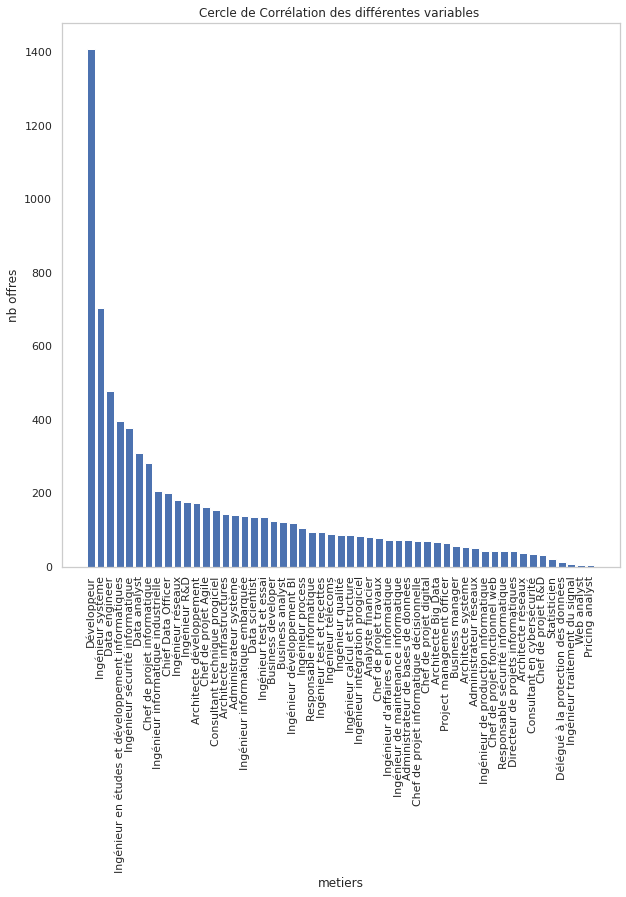

In [ ]:
colonnes = list(table_contingence.columns)[1:]

nb_offres = table_contingence[colonnes].sum()

propostion_metiers = nb_offres.sort_values(ascending=False)

# Affichage du cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(propostion_metiers.index,propostion_metiers)

# Ajout de labels aux axes
ax.set_xlabel("metiers")
ax.set_ylabel("nb offres")

# Ajout d'une grille
ax.grid()
plt.xticks(rotation="vertical")
# Affichage du cercle
plt.title('Cercle de Corrélation des différentes variables ')
plt.show()

In [ ]:

ma_ca = CA(row_labels = table_contingence.index.values,col_labels=table_contingence.columns.values,stats=True)
ma_ca.fit(table_contingence.values)

CA(col_labels=array(['Administrateur data center', 'Administrateur de bases de données',
       'Administrateur réseaux', 'Administrateur système',
       'Analyste financier', 'Architecte Big Data',
       'Architecte développement', 'Architecte infrastructures',
       'Architecte réseaux', 'Architecte système', 'Business analyst',
       'Business developer', 'Business manager', 'Chef de projet Agile',
       'Chef de proj...
       'Moselle', 'Nièvre', 'Nord', 'Oise', 'Orne', 'Paris',
       'Pas-de-Calais', 'Puy-de-Dôme', 'Pyrénées-Atlantiques',
       'Pyrénées-Orientales', 'Rhône', 'Sarthe', 'Savoie',
       'Saône-et-Loire', 'Seine-Maritime', 'Seine-Saint-Denis',
       'Seine-et-Marne', 'Somme', 'Tarn', 'Tarn-et-Garonne',
       'Territoire-de-Belfort', "Val-d'Oise", 'Val-de-Marne', 'Var',
       'Vaucluse', 'Vendée', 'Vienne', 'Vosges', 'Yonne', 'Yvelines'],
      dtype=object))

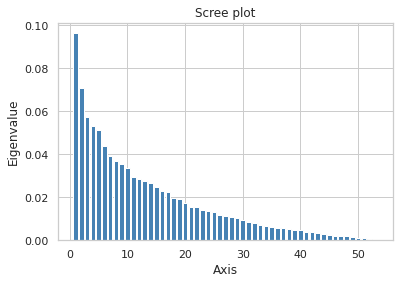

In [ ]:
ma_ca.plot_eigenvalues()

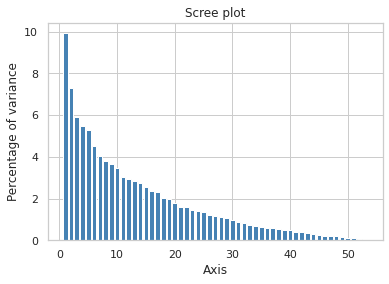

In [ ]:
ma_ca.plot_eigenvalues(type="percentage")

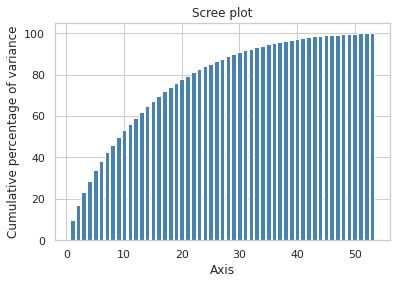

In [ ]:
ma_ca.plot_eigenvalues(type="cumulative")

##### Pour analyser les qualité il faut avoir le cos2 : 

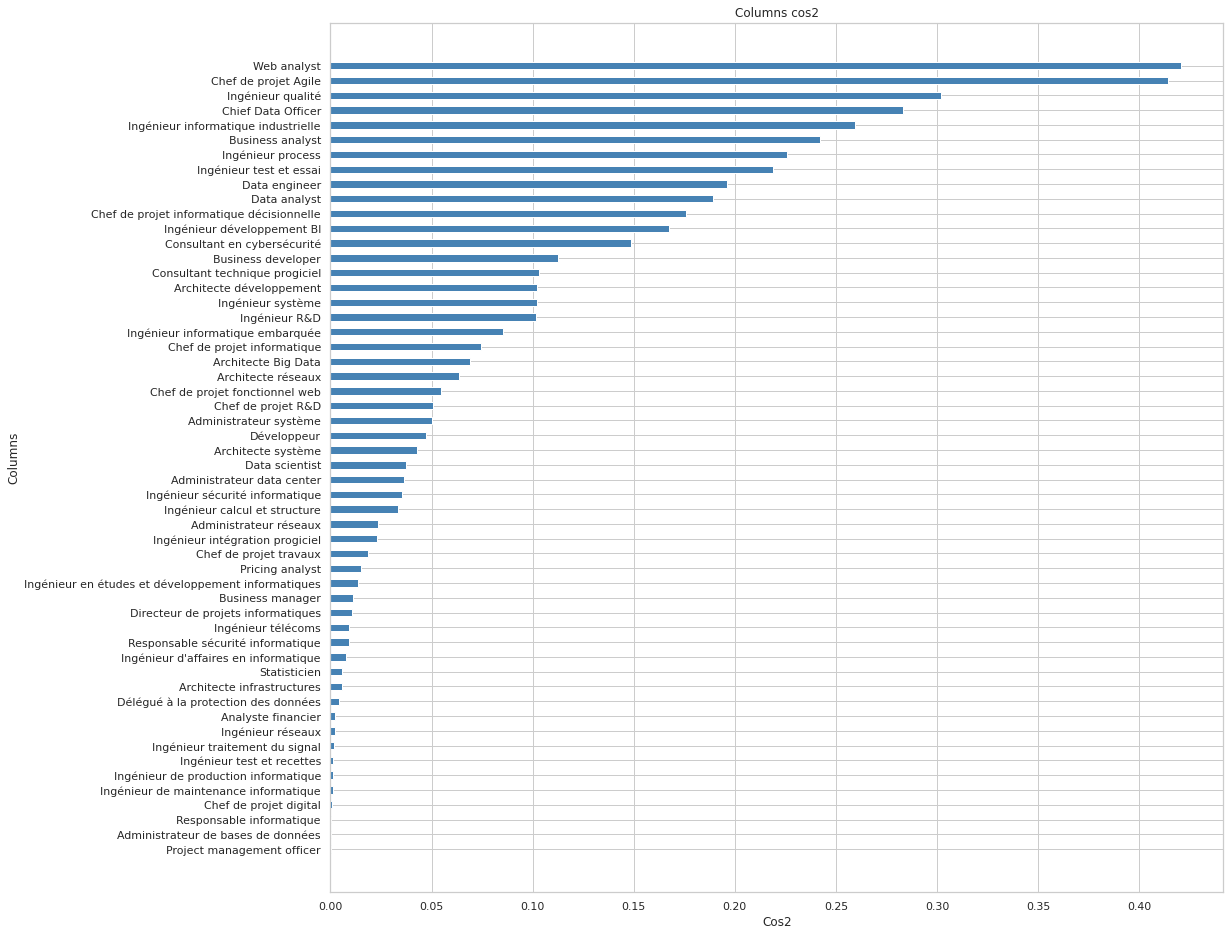

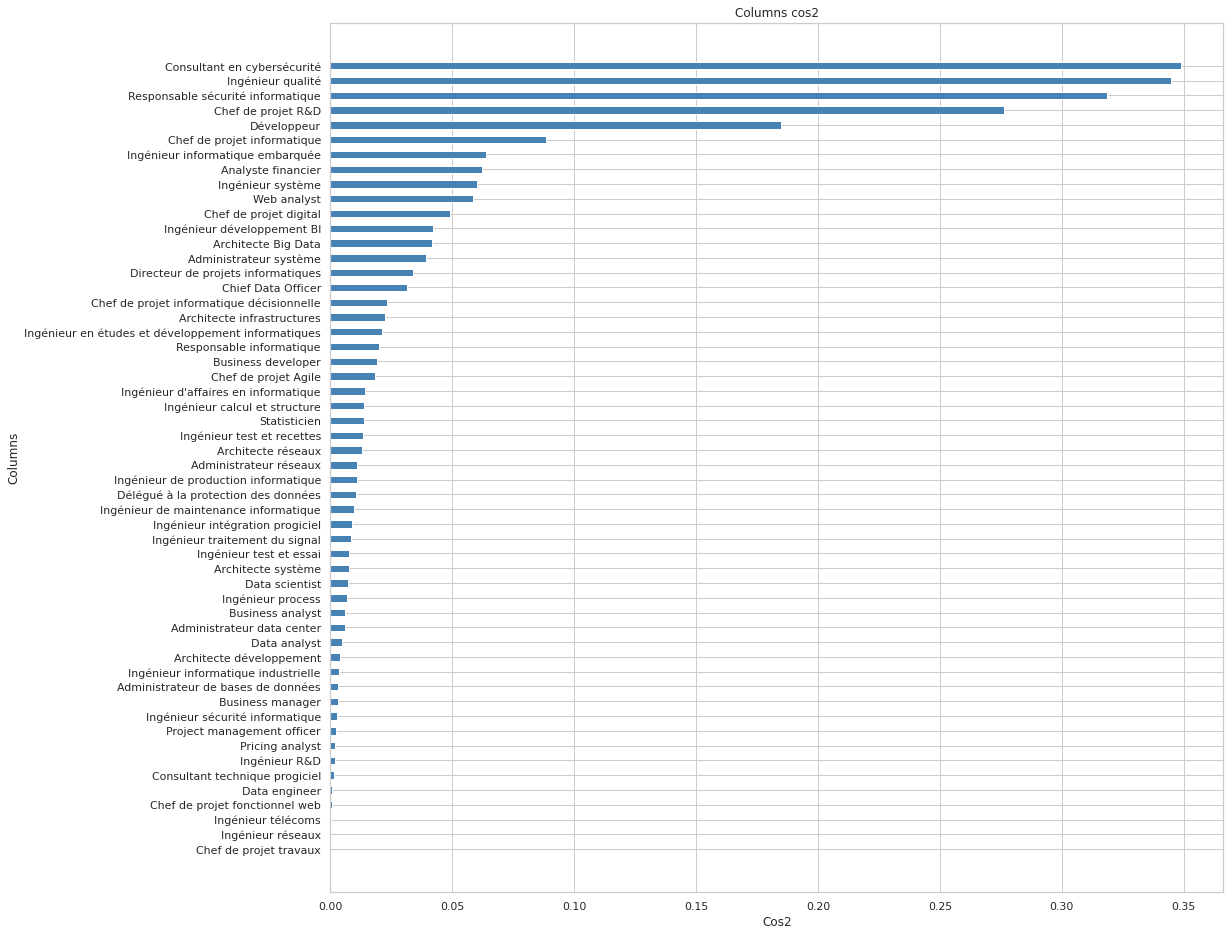

In [ ]:
ma_ca.plot_col_cos2(num_axis=1, figsize=(16, 16))

ma_ca.plot_col_cos2(num_axis=2, figsize=(16, 16))

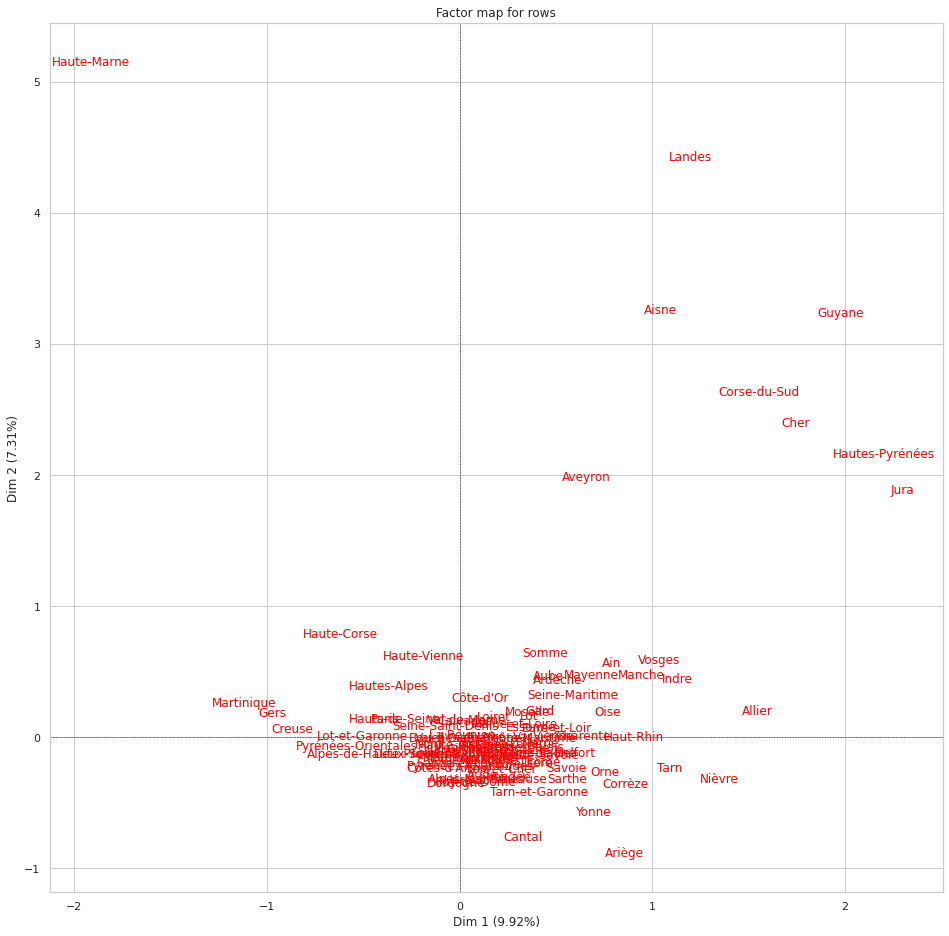

In [ ]:
ma_ca.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(16, 16))

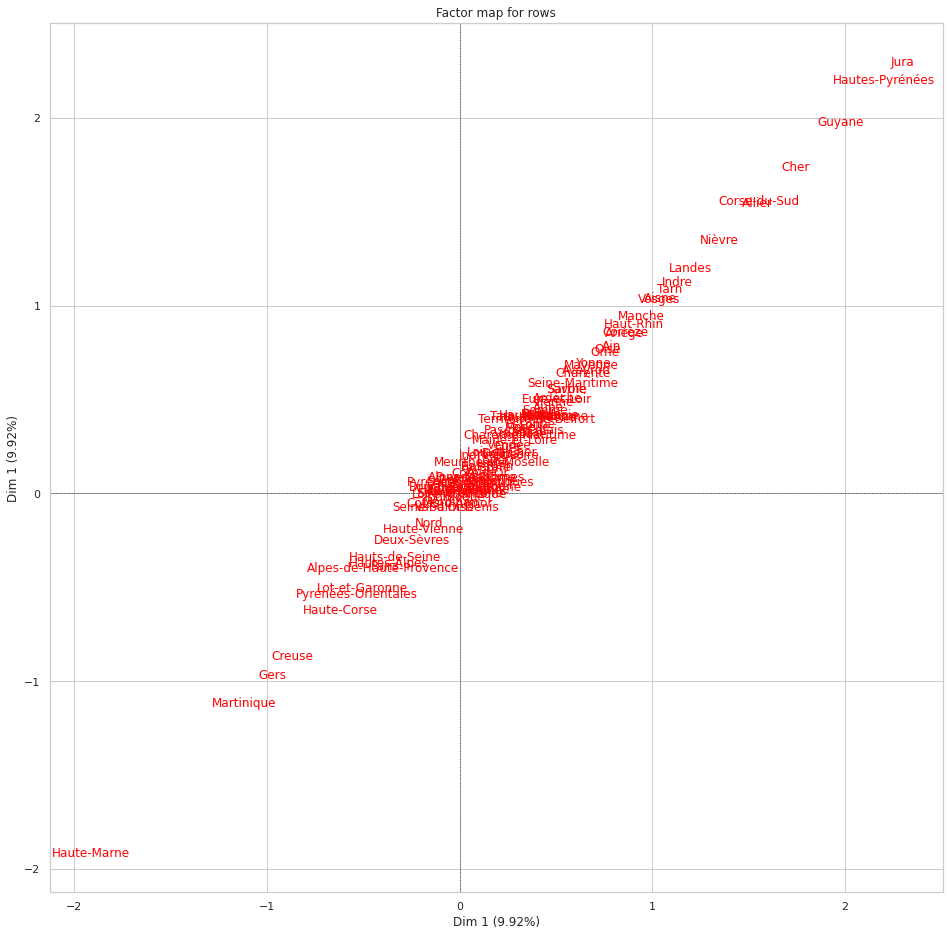

In [ ]:
ma_ca.mapping_row(num_x_axis=1,num_y_axis=1,figsize=(16, 16))

*       On ne peut pas effectuer des interpretation car la qualité de representation avce le cos carré n'est pas bonne < 0.5 AFC PERMET DE deduire l'association entre les modalités de deux variable qualitatives afin de de pouvoir reduire la dimension un dataset 

#### ACM

In [ ]:
colonnes = ['departement', 'entreprise',
       'type_contrat', 'metier', 'statut_du_poste',
       'zone_de_deplacement']
df_for_ACM = df_merged_with_categoril_attributes[colonnes]
# df_for_ACM["experience"] = df_for_ACM["experience"].astype('object')

# df_for_ACM.dtypes


In [ ]:
import fanalysis.mca as mca


In [ ]:
df_for_ACM.isna().sum()

departement            0
entreprise             0
experience             0
Teletravail            0
type_contrat           0
metier                 0
statut_du_poste        0
zone_de_deplacement    0
dtype: int64

In [ ]:

print(df_for_ACM.index.values)
# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df_for_ACM.index.values, var_labels=colonnes)

# Estimation de l'ACM
my_mca.fit(df_for_ACM.values)

[   0    1    2 ... 8039 8040 8041]


In [ ]:
print(my_mca.eig_)


In [ ]:
my_mca.plot_eigenvalues()


In [ ]:
my_mca.plot_eigenvalues(type="percentage")


In [ ]:
my_mca.plot_eigenvalues(type="cumulative")


In [ ]:
print("Premier Axe")

my_mca.plot_row_cos2(num_axis=1)
print("Deuxième  Axe")

my_mca.plot_row_cos2(num_axis=2)

## Anyes

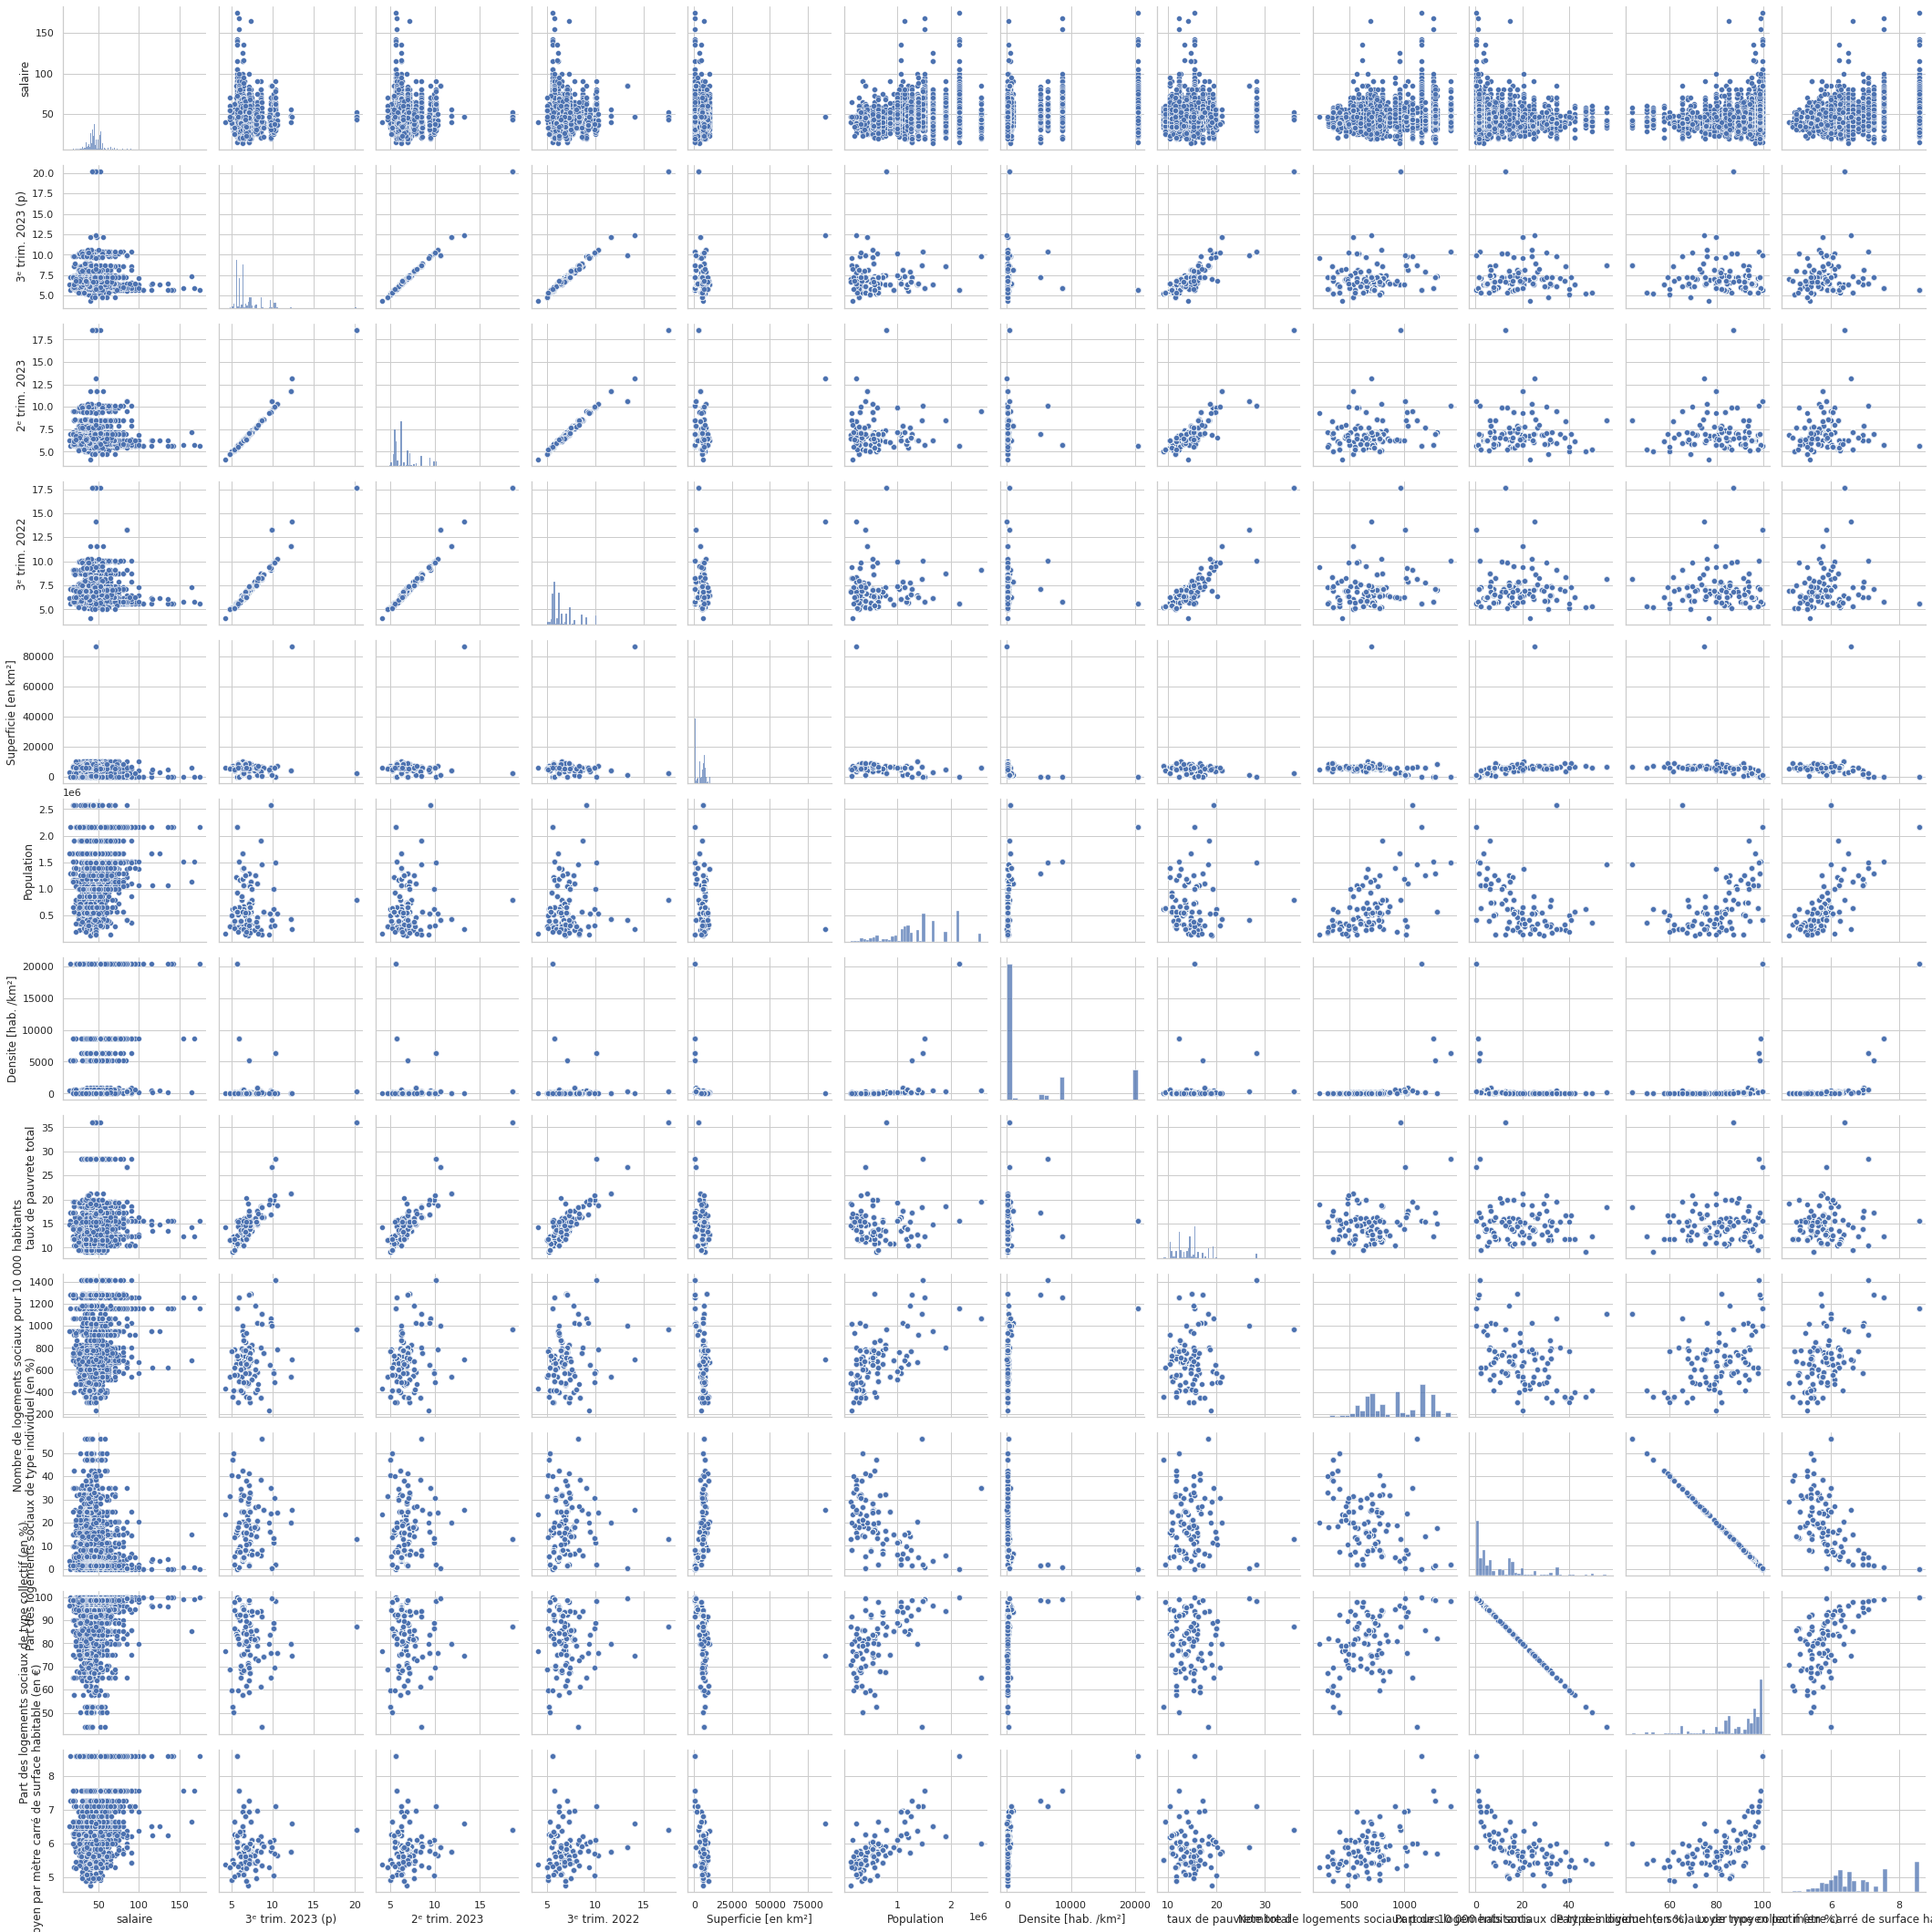

In [ ]:
sns.pairplot(df_merged)

il y a des colonne qu'il faut rendre de type numérique 

In [ ]:
colonnes_numeriques = df_merged.select_dtypes(include='number')
colonnes_numeriques

salaire  3ᵉ trim. 2023 (p)  2ᵉ trim. 2023  3ᵉ trim. 2022  \
0     40.00000                8.6            8.5            8.7   
1     40.00000                8.6            8.5            8.7   
2     47.50000                8.6            8.5            8.7   
3     36.00000                8.6            8.5            8.7   
4     40.00000                8.6            8.5            8.7   
...        ...                ...            ...            ...   
8037  52.50000                7.2            7.1            7.4   
8038  52.50000                7.2            7.1            7.4   
8039  34.00000                6.8            6.4            6.3   
8040  22.50000                6.8            6.4            6.3   
8041  46.20672                9.6            9.3            9.4   

      Superficie [en km²]  Population  Densite [hab. /km²]  \
0                  5087.0   1906000.0                375.0   
1                  5087.0   1906000.0                375.0   
2                  5087.0   1906000.0                375.0   
3                  5087.0   1906000.0                375.0   
4                  5087.0   1906000.0                375.0   
...                   ...         ...                  ...   
8037               5361.0    305380.0                 57.0   
8038               5361.0    305380.0                 57.0   
8039               6211.0    186500.0                 30.0   
8040               6211.0    186500.0                 30.0   
8041               4890.0    137205.0                 28.0   

      taux de pauvrete total  \
0                       18.5   
1                       18.5   
2                       18.5   
3                       18.5   
4                       18.5   
...                      ...   
8037                    17.7   
8038                    17.7   
8039                    15.3   
8040                    15.3   
8041                    19.0   

      Nombre de logements sociaux pour 10 000 habitants  \
0                                                   801   
1                                                   801   
2                                                   801   
3                                                   801   
4                                                   801   
...                                                 ...   
8037                                                350   
8038                                                350   
8039                                                935   
8040                                                935   
8041                                                232   

      Part des logements sociaux de type individuel (en %)  \
0                                                   6.0      
1                                                   6.0      
2                                                   6.0      
3                                                   6.0      
4                                                   6.0      
...                                                 ...      
8037                                               30.5      
8038                                               30.5      
8039                                               18.9      
8040                                               18.9      
8041                                               20.2      

      Part des logements sociaux de type collectif (en %)  \
0                                                  94.0     
1                                                  94.0     
2                                                  94.0     
3                                                  94.0     
4                                                  94.0     
...                                                 ...     
8037                                               69.5     
8038                                               69.5     
8039                                               81.1     
8040    

<Axes: >

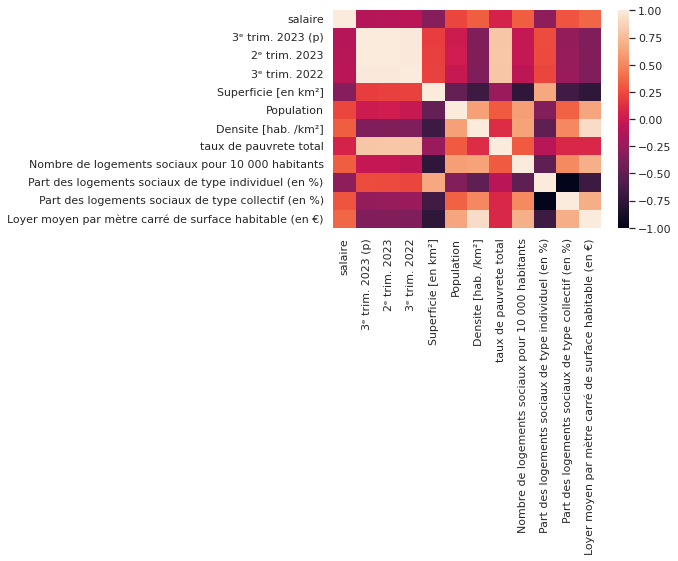

In [ ]:
corr = colonnes_numeriques.corr()
sns.heatmap(corr)

## Visualiser sur une map la répartition des offres d'emploi par département : 

In [39]:
df_count = df.groupby("code_postal").size().reset_index(name='nombre_offres')
df_count = df_count.rename(columns=lambda x: x.replace('code_postal', 'code'))

df_count

code  nombre_offres
0    01             24
1    02              5
2    03              6
3    04              1
4    05              2
..  ...            ...
90   94            222
91   95             89
92  972             15
93  973              2
94  974              9

[95 rows x 2 columns]

<ipython-input-41-fb8b23103875>:15: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




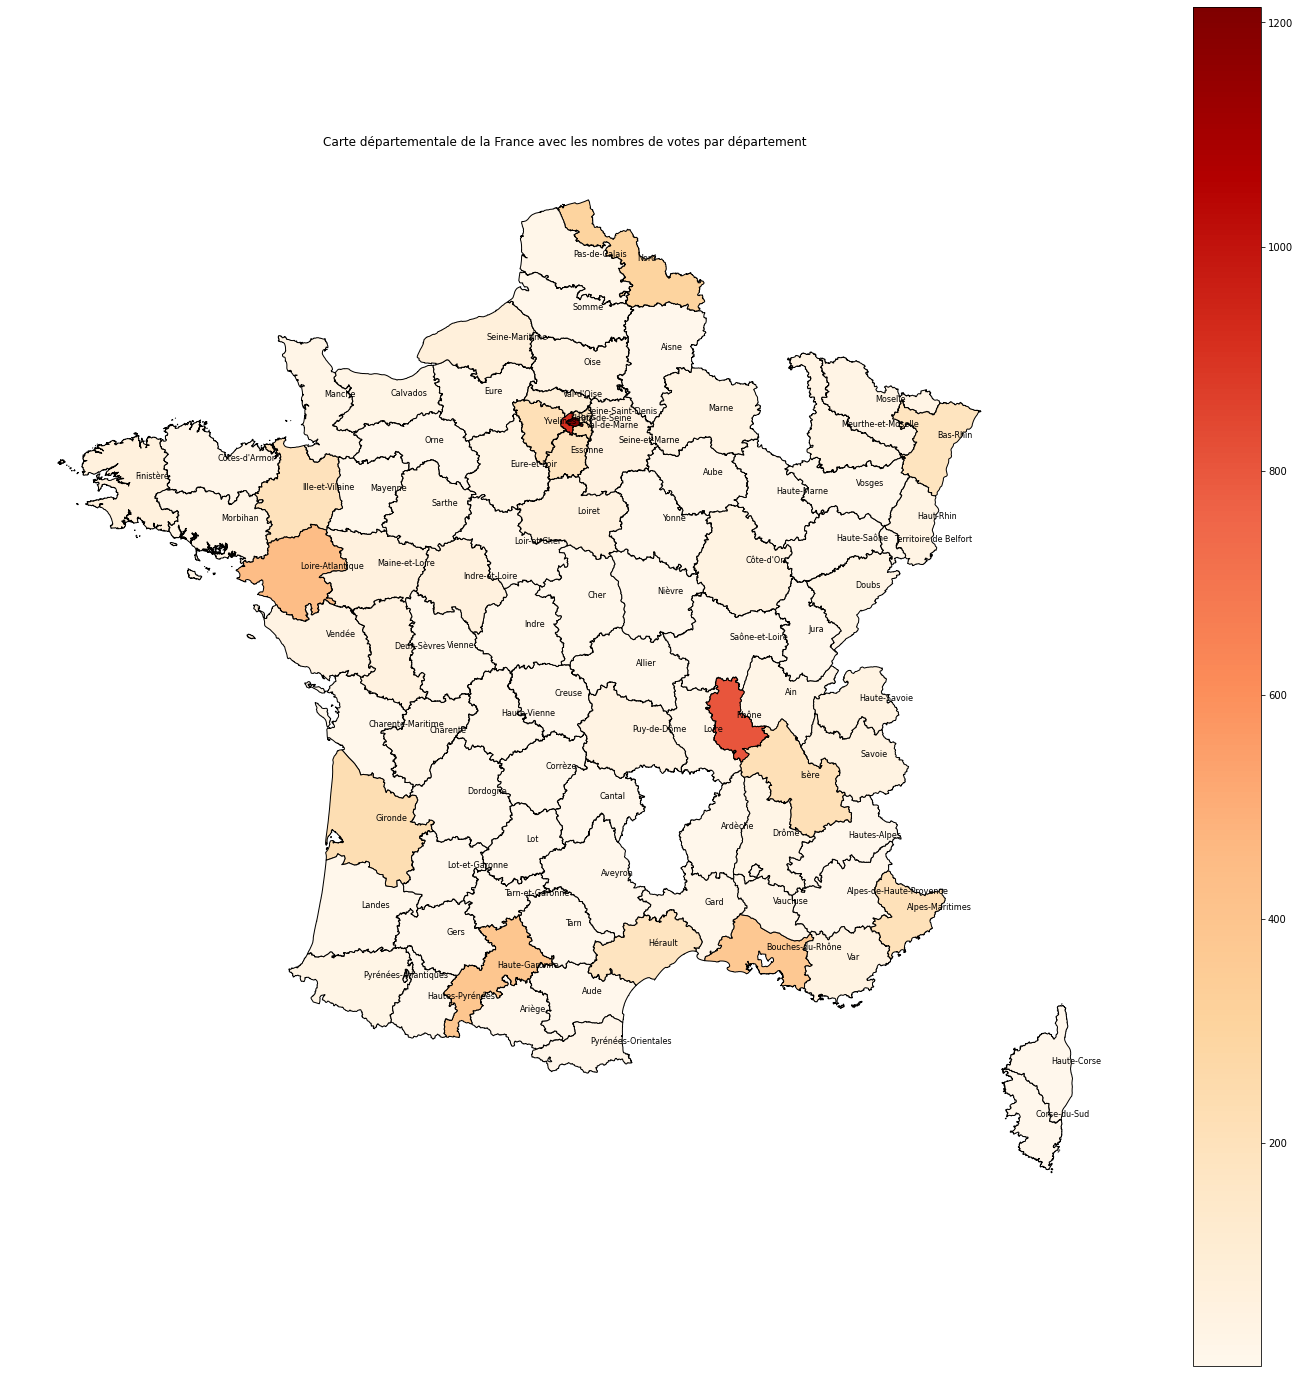

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

france_map = gpd.read_file('contour-des-departements.geojson')

# Supposons que vous ayez déjà une jointure entre les données géographiques et les données de vote
jointure = pd.merge(france_map, df_count, on='code', how='inner')

# Créer la carte
fig, ax = plt.subplots(figsize=(25, 25))
jointure.plot(ax=ax, edgecolor='black', column='nombre_offres', cmap='OrRd', legend=True)

# Ajouter les noms des départements au survol
for x, y, label in zip(jointure.geometry.centroid.x, jointure.geometry.centroid.y, jointure['nom']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

plt.title("Carte départementale de la France avec les nombres de votes par département")
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')


In [ ]:
df.isna().sum()


entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

In [ ]:

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()
### Remplacer les valeurs NaN par la moyenne générale des salaires
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement

for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()
### Remplacer les valeurs NaN de l'attribut "Teletravail" avec la categorie "non specifié":
df['Teletravail'] = df['Teletravail'].fillna('non spécifié')
df.head(10)

entreprise type_contrat date_publication  \
0  MICHAEL PAGE INTERNATIONAL FRANCE          CDI       2024-02-29   
1                Charlotte Drahy sas          CDI       2024-01-17   
2                              LOEMA          CDI       2024-02-22   
3                              CELAD          CDI       2024-02-29   
4                       EASY PARTNER          CDI       2024-03-01   
5                           Adsearch          CDI       2024-03-10   
6                           Expectra          CDI       2024-02-21   
7               ASSOCIATION COCKTAIL          CDI       2024-01-22   
8                        RECRUT-INFO          CDI       2024-02-02   
9                  LEO INTERNATIONAL          CDI       2024-03-13   

  date_mise_a_jour    salaire    prise_de_poste  experience       metier  \
0       2024-02-29  40.000000  Dès que possible           0  Développeur   
1       2024-03-15  40.000000  Dès que possible           5  Développeur   
2       2024-02-22  47.500000  Dès que possible           4  Développeur   
3       2024-02-29  36.000000  Dès que possible           1  Développeur   
4       2024-03-01  40.000000  Dès que possible           3  Développeur   
5       2024-03-10  45.000000  Dès que possible           2  Développeur   
6       2024-02-21  46.935417  Dès que possible           5  Développeur   
7       2024-03-11  46.935417  Dès que possible           5  Développeur   
8       2024-03-04  47.500000  Dès que possible           5  Développeur   
9       2024-03-13  62.500000  Dès que possible           3  Développeur   

          statut_du_poste zone_de_deplacement  ...  \
0  Cadre du secteur privé  Pas de déplacement  ...   
1  Cadre du secteur privé           Nationale  ...   
2  Cadre du secteur privé  Pas de déplacement  ...   
3  Cadre du secteur privé  Pas de déplacement  ...   
4  Cadre du secteur privé  Pas de déplacement  ...   
5  Cadre du secteur privé  Pas de déplacement  ...   
6  Cadre du secteur privé  Pas de déplacement  ...   
7  Cadre du secteur privé  Pas de déplacement  ...   
8  Cadre du secteur privé  Pas de déplacement  ...   
9  Cadre du secteur privé  Pas de déplacement  ...   

                                    profil_recherche                 langues  \
0  De formation supérieure en informatique, vous ...  Aucune langue attendue   
1  Les compétences requises sont :\nProgrammation...       Anglais, Français   
2  Vous avez une expérience en : \n-    Programma...  Aucune langue attendue   
3  Idéalement ingénieur de formation, vous justif...  Aucune langue attendue   
4  Profil recherché\nNous recherchons un profil a...  Aucune langue attendue   
5  Vous avez une première expérience de minium de...  Aucune langue attendue   
6  De formation supérieure en informatique, vous ...  Aucune langue attendue   
7  De formation supérieure en informatique, vous ...  Aucune langue attendue   
8  Autodidacte ou Diplômé·e en informatique, vous...  Aucune langue attendue   
9  La maîtrise de Talend (version utilisée : 7.3)...                 Anglais   

                                         savoir_etre  \
0  ['Autonomie', "Capacité d'analyse", 'Capacité ...   
1       ["Esprit d'équipe", 'Motivation', 'Rigueur']   
2                 ['Curiosité', 'Goût du challenge']   
3  ['Autonomie', 'Force de proposition', 'Qualité...   
4  ['Ambition', 'Autonomie', 'Bienveillance', 'Ca...   
5                      ['Aucun savoir-être attendu']   
6  ["Capacité d'adaptation", "Capacité d'analyse"...   
7  ['Bienveillance', "Capacité d'adaptation", "Ca...   
8                      ['Aucun savoir-être attendu']   
9                      ['Capacité de communication']   

                                        savoir_faire  \
0  ['Application Web', 'Développement web', 'Info...   
1  ['Analyse des besoins', 'Analyse fonctionnelle...   
2  ['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...   
3  ['Framework', 'JavaScript', 'ReactJS', 'TypeSc...   
4  ['Nuxt', 'Vue.js', 'Développement web', 'R

In [ ]:
df.columns

Index(['entreprise', 'type_contrat', 'date_publication', 'date_mise_a_jour',
       'salaire', 'prise_de_poste', 'experience', 'metier', 'statut_du_poste',
       'zone_de_deplacement', 'secteur_d_activite', 'Teletravail',
       'descriptif_poste', 'profil_recherche', 'langues', 'savoir_etre',
       'savoir_faire', 'descriptif_entreprise', 'nombre_posts', 'duree',
       'ville', 'code_postal', 'departement'],
      dtype='object')

In [ ]:
# Définir une fonction pour remplacer les valeurs
liste_valeurs_autorisees= ['CDI', 'CDD', "Mission d'intérim"]
def remplacer_par(valeur):
    if valeur in liste_valeurs_autorisees:
        return valeur
    else:
        return 'Alternance'

# Appliquer la fonction à la colonne
df['type_contrat'] = df['type_contrat'].apply(remplacer_par)

df['type_contrat'].unique()


array(['CDI', 'CDD', "Mission d'intérim", 'Alternance'], dtype=object)

In [ ]:
df_filtred = df[[ "entreprise",'type_contrat',
       'salaire', 'experience', 'metier',
       'zone_de_deplacement',  'Teletravail',
       'departement','statut_du_poste']]
df_filtred


entreprise type_contrat  \
0                     MICHAEL PAGE INTERNATIONAL FRANCE          CDI   
1                                   Charlotte Drahy sas          CDI   
2                                                 LOEMA          CDI   
3                                                 CELAD          CDI   
4                                          EASY PARTNER          CDI   
...                                                 ...          ...   
8037                                              Seyos          CDI   
8038                                       LES COLETTES          CDI   
8039                      Armée de l'Air et de l'Espace          CDD   
8040                      Armée de l'Air et de l'Espace          CDD   
8041  Centre Hospitalier Intercommunal des Vallées d...          CDD   

       salaire  experience                             metier  \
0     40.00000           0                        Développeur   
1     40.00000           5                        Développeur   
2     47.50000           4                        Développeur   
3     36.00000           1                        Développeur   
4     40.00000           3                        Développeur   
...        ...         ...                                ...   
8037  52.50000           5                 Business developer   
8038  52.50000           2         Ingénieur test et recettes   
8039  34.00000           0        Consultant en cybersécurité   
8040  22.50000           0  Responsable sécurité informatique   
8041  46.20672           3             Administrateur système   

     zone_de_deplacement        Teletravail       departement  \
0     Pas de déplacement       non spécifié  Bouches-du-Rhône   
1              Nationale   Partiel possible  Bouches-du-Rhône   
2     Pas de déplacement  Ponctuel autorisé  Bouches-du-Rhône   
3     Pas de déplacement       non spécifié  Bouches-du-Rhône   
4     Pas de déplacement     Total possible  Bouches-du-Rhône   
...                  ...                ...               ...   
8037  Pas de déplacement   Partiel possible    Lot-et-Garonne   
8038  Pas de déplacement       non spécifié    Lot-et-Garonne   
8039           Nationale       non spécifié       Haute-Marne   
8040           Nationale       non spécifié       Haute-Marne   
8041  Pas de déplacement       non spécifié            Ariège   

                       statut_du_poste  
0               Cadre du secteur privé  
1               Cadre du secteur privé  
2               Cadre du secteur privé  
3               Cadre du secteur privé  
4               Cadre du secteur privé  
...                                ...  
8037            Cadre du secteur privé  
8038            Cadre du secteur privé  
8039  Cadre du secteur public / Armées  
8040  Cadre du secteur public / Armées  
8041    Agent de maîtrise / Technicien  

[8042 rows x 9 columns]

## Filtrer par domaine :

In [ ]:
df_filtred['metier'].unique()

array(['Développeur', 'Architecte développement', 'Data engineer',
       'Ingénieur test et recettes', 'Ingénieur test et essai',
       'Ingénieur en études et développement informatiques',
       'Chef de projet fonctionnel web', 'Responsable informatique',
       'Ingénieur informatique industrielle',
       'Ingénieur de production informatique',
       'Project management officer', 'Ingénieur R&D',
       'Ingénieur sécurité informatique',
       'Ingénieur de maintenance informatique',
       'Consultant technique progiciel', 'Ingénieur calcul et structure',
       'Ingénieur télécoms', 'Ingénieur process',
       'Chef de projet informatique', 'Architecte infrastructures',
       'Administrateur de bases de données', 'Chef de projet Agile',
       'Ingénieur intégration progiciel', 'Analyste financier',
       'Chef de projet R&D', 'Chef de projet travaux',
       'Responsable sécurité informatique', 'Ingénieur système',
       'Ingénieur qualité', 'Data analyst', 'Chief Data O

In [ ]:
dev=['Développeur','Architecte développement', 'Ingénieur test et recettes','Ingénieur test et essai', 'Ingénieur en études et développement informatiques',
       'Ingénieur de maintenance informatique', 'Ingénieur intégration progiciel', 'Consultant technique progiciel','Business developer'     ]

data = ['Data engineer','Ingénieur R&D','Administrateur de bases de données','Analyste financier',
        'Chef de projet R&D', 'Data analyst','Chief Data Officer', 'Data scientist','Administrateur data center',
         'Architecte Big Data', 'Délégué à la protection des données','Web analyst' ]



reseaux = [  'Ingénieur télécoms', 'Ingénieur process','Architecte infrastructures',
           'Administrateur réseaux','Ingénieur réseaux', 'Administrateur système','Ingénieur système',
              'Architecte réseaux',   'Ingénieur traitement du signal','Architecte système']

securite = ['Ingénieur sécurité informatique', 'Responsable sécurité informatique','Consultant en cybersécurité',]

miage = ['Responsable informatique','Ingénieur informatique industrielle',
         'Ingénieur de production informatique', 'Project management officer',
         'Ingénieur calcul et structure',
          'Chef de projet informatique','Chef de projet Agile',
         'Chef de projet travaux','Ingénieur développement BI',
         'Business manager','Business analyst',       'Chef de projet informatique décisionnelle',
         'Directeur de projets informatiques',
         'Chef de projet digital','Chef de projet fonctionnel web' ]

In [ ]:
for dom in [dev,data,reseaux,securite,miage]:
  metiers_inclus = df_filtred[df_filtred['metier'].isin(dom)]

  # Compter le nombre de ces lignes
  nombre_lignes = len(metiers_inclus)
  print(nombre_lignes)

2642
1588
1508
452
1531


In [ ]:
# Fonction pour attribuer le domaine
def assign_domaine(metier):
    if metier in dev:
        return 'développement'
    elif metier in data:
        return 'data'
    elif metier in reseaux:
        return 'réseaux'
    elif metier in securite:
        return 'securité'
    elif metier in miage:
        return 'miage'
    else:
        return 'autre'  # Pour les métiers qui ne sont dans aucune liste

# Appliquer la fonction pour créer la colonne 'domaine'
df_filtred['domaine'] = df_filtred['metier'].apply(assign_domaine)

/tmp/ipykernel_51893/1802489644.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['domaine'] = df_filtred['metier'].apply(assign_domaine)


In [ ]:
df_filtred

entreprise type_contrat  \
0                     MICHAEL PAGE INTERNATIONAL FRANCE          CDI   
1                                   Charlotte Drahy sas          CDI   
2                                                 LOEMA          CDI   
3                                                 CELAD          CDI   
4                                          EASY PARTNER          CDI   
...                                                 ...          ...   
8037                                              Seyos          CDI   
8038                                       LES COLETTES          CDI   
8039                      Armée de l'Air et de l'Espace          CDD   
8040                      Armée de l'Air et de l'Espace          CDD   
8041  Centre Hospitalier Intercommunal des Vallées d...          CDD   

       salaire  experience                             metier  \
0     40.00000           0                        Développeur   
1     40.00000           5                        Développeur   
2     47.50000           4                        Développeur   
3     36.00000           1                        Développeur   
4     40.00000           3                        Développeur   
...        ...         ...                                ...   
8037  52.50000           5                 Business developer   
8038  52.50000           2         Ingénieur test et recettes   
8039  34.00000           0        Consultant en cybersécurité   
8040  22.50000           0  Responsable sécurité informatique   
8041  46.20672           3             Administrateur système   

     zone_de_deplacement        Teletravail       departement  \
0     Pas de déplacement       non spécifié  Bouches-du-Rhône   
1              Nationale   Partiel possible  Bouches-du-Rhône   
2     Pas de déplacement  Ponctuel autorisé  Bouches-du-Rhône   
3     Pas de déplacement       non spécifié  Bouches-du-Rhône   
4     Pas de déplacement     Total possible  Bouches-du-Rhône   
...                  ...                ...               ...   
8037  Pas de déplacement   Partiel possible    Lot-et-Garonne   
8038  Pas de déplacement       non spécifié    Lot-et-Garonne   
8039           Nationale       non spécifié       Haute-Marne   
8040           Nationale       non spécifié       Haute-Marne   
8041  Pas de déplacement       non spécifié            Ariège   

                       statut_du_poste        domaine  
0               Cadre du secteur privé  développement  
1               Cadre du secteur privé  développement  
2               Cadre du secteur privé  développement  
3               Cadre du secteur privé  développement  
4               Cadre du secteur privé  développement  
...                                ...            ...  
8037            Cadre du secteur privé  développement  
8038            Cadre du secteur privé  développement  
8039  Cadre du secteur public / Armées       securité  
8040  Cadre du secteur public / Armées       securité  
8041    Agent de maîtrise / Technicien        réseaux  

[8042 rows x 10 columns]

In [ ]:
# Grouper par département et domaine et compter les offres
df_filtred_groupedBy_dep = df_filtred.groupby(['departement', 'domaine']).size().unstack(fill_value=0)
# df_filtred_groupedBy_dep.columns =[["deparetement",	"data",	"développement",	"miage",	"réseaux",	"securité",	"autre"]]

df_filtred_groupedBy_dep.columns


Index(['autre', 'data', 'développement', 'miage', 'réseaux', 'securité'], dtype='object', name='domaine')

In [ ]:
df_filtred_groupedBy_dep

domaine                  autre  data  développement  miage  réseaux  securité
departement                                                                  
Ain                          2     2              3      8        8         1
Aisne                        0     3              0      2        0         0
Allier                       0     1              2      0        3         0
Alpes-Maritimes              5    30            110     22       26        12
Alpes-de-Haute-Provence      0     0              0      0        0         1
...                        ...   ...            ...    ...      ...       ...
Vendée                       3     7             15      6        9         0
Vienne                       0     1              3      2        3         0
Vosges                       1     0              4      1        1         0
Yonne                        0     0              3      0        1         0
Yvelines                    18    28             54     40       61        16

[95 rows x 6 columns]

In [ ]:
df_filtred_groupedBy_dep_reset = df_filtred_groupedBy_dep.reset_index()

df_filtred_groupedBy_dep_reset.columns

Index(['departement', 'autre', 'data', 'développement', 'miage', 'réseaux',
       'securité'],
      dtype='object', name='domaine')

In [ ]:
df_filtred_groupedBy_dep_reset

domaine              departement  autre  data  développement  miage  réseaux  \
0                            Ain      2     2              3      8        8   
1                          Aisne      0     3              0      2        0   
2                         Allier      0     1              2      0        3   
3                Alpes-Maritimes      5    30            110     22       26   
4        Alpes-de-Haute-Provence      0     0              0      0        0   
..                           ...    ...   ...            ...    ...      ...   
90                        Vendée      3     7             15      6        9   
91                        Vienne      0     1              3      2        3   
92                        Vosges      1     0              4      1        1   
93                         Yonne      0     0              3      0        1   
94                      Yvelines     18    28             54     40       61   

domaine  securité  
0               1  
1               0  
2               0  
3              12  
4               1  
..            ...  
90              0  
91              0  
92              0  
93              0  
94             16  

[95 rows x 7 columns]

In [ ]:
#
# !pip install Dash

In [ ]:
#!pip install dash_bootstrap_components

In [ ]:
offers_by_departement = df.groupby('departement').size().reset_index(name='nombre_offres')
offers_by_departement

departement  nombre_offres
0                       Ain             24
1                     Aisne              5
2                    Allier              6
3           Alpes-Maritimes            205
4   Alpes-de-Haute-Provence              1
..                      ...            ...
90                   Vendée             40
91                   Vienne              9
92                   Vosges              7
93                    Yonne              4
94                 Yvelines            217

[95 rows x 2 columns]

# Lecture des autres données 

## 2.2. Taux de chomâge

In [ ]:
df_chomage = pd.read_csv('Scrapped_Data/taux_chomage.csv')
df_chomage.drop(columns=['Unnamed: 0'], inplace=True)
df_chomage

departement 3ᵉ trim. 2023 (p) 2ᵉ trim. 2023 3ᵉ trim. 2022
0                        Ain               5,7           5,4           5,4
1                      Aisne              10,6          10,3          10,3
2                     Allier               7,9           7,7           7,6
3    Alpes-de-Haute-Provence               8,3           8,0           8,3
4               Hautes-Alpes               6,7           6,5           6,8
..                       ...               ...           ...           ...
97                Guadeloupe              17,4          19,4          18,3
98                Martinique               9,9          10,6          13,3
99                    Guyane              12,4          13,2          14,1
100               La Réunion              20,2          18,6          17,6
101                  Mayotte               7,4           7,2           7,2

[102 rows x 4 columns]

In [ ]:
df_chomage.dtypes

departement          object
3ᵉ trim. 2023 (p)    object
2ᵉ trim. 2023        object
3ᵉ trim. 2022        object
dtype: object

In [ ]:
df_chomage['3ᵉ trim. 2023 (p)'] = df_chomage['3ᵉ trim. 2023 (p)'].str.replace(',', '.').astype(float)
df_chomage['2ᵉ trim. 2023'] = df_chomage['2ᵉ trim. 2023'].str.replace(',', '.').astype(float)
df_chomage['3ᵉ trim. 2022'] = df_chomage['3ᵉ trim. 2022'].str.replace(',', '.').astype(float)

In [ ]:
df_chomage = df_chomage[[ 'departement' ,"3ᵉ trim. 2023 (p)"]]
df_chomage.columns = ['departement' ,"taux_chaumage"]
df_chomage

departement  taux_chaumage
0                        Ain            5.7
1                      Aisne           10.6
2                     Allier            7.9
3    Alpes-de-Haute-Provence            8.3
4               Hautes-Alpes            6.7
..                       ...            ...
97                Guadeloupe           17.4
98                Martinique            9.9
99                    Guyane           12.4
100               La Réunion           20.2
101                  Mayotte            7.4

[102 rows x 2 columns]

## 2.3. Données sur la population

In [ ]:
df_pop = pd.read_csv('Scrapped_Data/data_Pop.csv')
df_pop[['departement', 'code_postal', 'Région']] = df_pop['departement/code_postal/Région'].str.extract(r'^(.*?)\((.*?)\)\[(.*?)\]$')
df_pop.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop

Superficie [en km²] Population Densite [hab. /km²]            departement  \
0               86 504    230 000                   4                 Guyane   
1               10 000  1 376 000                 138                Gironde   
2                9 243    327 334                  35                 Landes   
3                9 060    401 500                  43               Dordogne   
4                8 763    506 755                  58              Côte-d'Or   
..                 ...        ...                 ...                    ...   
95                 609    137 408                 225  Territoire-de-Belfort   
96                 245  1 279 000               5 220           Val-de-Marne   
97                 236  1 485 000               6 292      Seine-Saint-Denis   
98                 176  1 517 000               8 619         Hauts-de-Seine   
99                 105  2 166 200              20 433                  Paris   

   code_postal         Région  
0          973         Guyane  
1           33      Aquitaine  
2           40      Aquitaine  
3           24      Aquitaine  
4           21      Bourgogne  
..         ...            ...  
95          90  Franche-Comté  
96          94  Île-de-France  
97          93  Île-de-France  
98          92  Île-de-France  
99          75  Île-de-France  

[100 rows x 6 columns]

In [ ]:
df_pop['Superficie [en km²]'] = df_pop['Superficie [en km²]'].str.replace('\xa0', '').astype(int)
df_pop['Population'] = df_pop['Population'].str.replace('\xa0', '').astype(int)
df_pop['Densite [hab. /km²]'] = df_pop['Densite [hab. /km²]'].str.replace('\xa0', '').astype(int)
df_pop

Superficie [en km²]  Population  Densite [hab. /km²]  \
0                 86504      230000                    4   
1                 10000     1376000                  138   
2                  9243      327334                   35   
3                  9060      401500                   43   
4                  8763      506755                   58   
..                  ...         ...                  ...   
95                  609      137408                  225   
96                  245     1279000                 5220   
97                  236     1485000                 6292   
98                  176     1517000                 8619   
99                  105     2166200                20433   

              departement code_postal         Région  
0                  Guyane         973         Guyane  
1                 Gironde          33      Aquitaine  
2                  Landes          40      Aquitaine  
3                Dordogne          24      Aquitaine  
4               Côte-d'Or          21      Bourgogne  
..                    ...         ...            ...  
95  Territoire-de-Belfort          90  Franche-Comté  
96           Val-de-Marne          94  Île-de-France  
97      Seine-Saint-Denis          93  Île-de-France  
98         Hauts-de-Seine          92  Île-de-France  
99                  Paris          75  Île-de-France  

[100 rows x 6 columns]

In [ ]:
df_pop = df_pop[["departement","Densite [hab. /km²]"]]
df_pop.columns = [ "departement", "densite_pop"]
df_pop

departement  densite_pop
0                  Guyane            4
1                 Gironde          138
2                  Landes           35
3                Dordogne           43
4               Côte-d'Or           58
..                    ...          ...
95  Territoire-de-Belfort          225
96           Val-de-Marne         5220
97      Seine-Saint-Denis         6292
98         Hauts-de-Seine         8619
99                  Paris        20433

[100 rows x 2 columns]

## 2.4. Taux de pauvrete

In [ ]:
df_pauvrete = pd.read_csv('Scrapped_Data/taux_pauvrete.csv')
df_pauvrete.drop(columns=['Unnamed: 0'], inplace=True)
df_pauvrete

departement taux de pauvrete total Moins de 30 ans 30-39 ans  \
0                       Ain                   10,8            15,0      11,8   
1                     Aisne                   18,8            30,4      23,3   
2                    Allier                   16,2            24,8      20,5   
3   Alpes-de-Haute-Provence                   17,1            24,2      20,7   
4              Hautes-Alpes                   14,7            22,0      17,4   
..                      ...                    ...             ...       ...   
94             Val-de-Marne                   17,2            22,5      17,9   
95               Val-d'Oise                   17,7            21,9      19,3   
96    France métropolitaine                   14,9            22,7      17,0   
97               Martinique                   26,8            46,3      34,1   
98               La Réunion                   36,1            51,6      40,9   

   40-49 ans 50-59 ans 60-74 ans 75 ans ou plus  
0       12,1      10,3       8,4            8,3  
1       21,2      17,7      13,6           10,8  
2       18,3      16,1      12,2           12,2  
3       20,1      17,2      13,8           12,9  
4       16,9      14,7      11,4           11,2  
..       ...       ...       ...            ...  
94      19,4      17,5      14,2           10,6  
95      20,6      17,3      13,6           10,5  
96      16,7      14,4      11,5           11,0  
97      27,1      25,4      22,4           29,3  
98      36,1      33,0      29,8           37,0  

[99 rows x 8 columns]

In [ ]:
df_pauvrete['taux de pauvrete total'] = df_pauvrete['taux de pauvrete total'].str.replace(',', '.').astype(float)
df_pauvrete['Moins de 30 ans'] = df_pauvrete['Moins de 30 ans'].str.replace(',', '.').astype(float)
df_pauvrete['30-39 ans'] = df_pauvrete['30-39 ans'].str.replace(',', '.').astype(float)
df_pauvrete['40-49 ans'] = df_pauvrete['40-49 ans'].str.replace(',', '.').astype(float)
df_pauvrete['50-59 ans'] = df_pauvrete['50-59 ans'].str.replace(',', '.').astype(float)
df_pauvrete['60-74 ans'] = df_pauvrete['60-74 ans'].str.replace(',', '.').astype(float)
df_pauvrete['75 ans ou plus'] = df_pauvrete['75 ans ou plus'].str.replace(',', '.').astype(float)
df_pauvrete.dtypes

departement                object
taux de pauvrete total    float64
Moins de 30 ans           float64
30-39 ans                 float64
40-49 ans                 float64
50-59 ans                 float64
60-74 ans                 float64
75 ans ou plus            float64
dtype: object

In [ ]:
df_pauvrete = df_pauvrete[["departement","taux de pauvrete total"]]
df_pauvrete.columns = [ "departement", "taux_pauvrete"]
df_pauvrete

departement  taux_pauvrete
0                       Ain           10.8
1                     Aisne           18.8
2                    Allier           16.2
3   Alpes-de-Haute-Provence           17.1
4              Hautes-Alpes           14.7
..                      ...            ...
94             Val-de-Marne           17.2
95               Val-d'Oise           17.7
96    France métropolitaine           14.9
97               Martinique           26.8
98               La Réunion           36.1

[99 rows x 2 columns]

## 2.5. Données sur le logement

In [ ]:
logement_df = pd.read_csv("Open Data/donnees_departements_Logement.csv")
logement_df

code_postal              departement  \
0            01                      Ain   
1            02                    Aisne   
2            03                   Allier   
3            04  Alpes-de-Haute-Provence   
4            05             Hautes-Alpes   
..          ...                      ...   
98          971               Guadeloupe   
99          972               Martinique   
100         973                   Guyane   
101         974               La Réunion   
102         976                  Mayotte   

     Nombre de logements sociaux pour 10 000 habitants  \
0                                                  727   
1                                                  787   
2                                                  601   
3                                                  469   
4                                                  569   
..                                                 ...   
98                                                 998   
99                                                1005   
100                                                699   
101                                                967   
102                                                 86   

     Part des logements sociaux de type individuel (en %)  \
0                                                 16.8      
1                                                 24.3      
2                                                 26.6      
3                                                 27.3      
4                                                 12.8      
..                                                 ...      
98                                                22.0      
99                                                 0.4      
100                                               25.4      
101                                               12.8      
102                                               35.4      

     Part des logements sociaux de type collectif (en %)  \
0                                                 83.2     
1                                                 75.7     
2                                                 73.4     
3                                                 72.7     
4                                                 87.2     
..                                                 ...     
98                                                78.0     
99                                                99.6     
100                                               74.6     
101                                               87.2     
102                                               64.6     

     Loyer moyen par mètre carré de surface habitable (en €)  
0                                                 6.23        
1                                                 5.64        
2                                                 5.42        
3                                                 6.10        
4                                                 5.44        
..                                                 ...        
98                                                6.42        
99                                                5.87        
100                                               6.59        
101                                               6.40        
102                                               8.54        

[103 rows x 6 columns]

In [ ]:
logement_df = logement_df[["departement","Loyer moyen par mètre carré de surface habitable (en €)"]]
logement_df.columns = [ "departement", "prix_loyer_moyen_m2"]
logement_df

departement  prix_loyer_moyen_m2
0                        Ain                 6.23
1                      Aisne                 5.64
2                     Allier                 5.42
3    Alpes-de-Haute-Provence                 6.10
4               Hautes-Alpes                 5.44
..                       ...                  ...
98                Guadeloupe                 6.42
99                Martinique                 5.87
100                   Guyane                 6.59
101               La Réunion                 6.40
102                  Mayotte                 8.54

[103 rows x 2 columns]

In [ ]:
df_niveau_vie = pd.read_csv("Scrapped_Data/Niveau_de_vie_median.csv")
df_niveau_vie = df_niveau_vie[["Département" , "Niveau de vie médian"]]
df_niveau_vie.columns = [ "departement", "Niveau de vie médian"]
df_niveau_vie

departement Niveau de vie médian
0                       Ain               24 030
1                     Aisne               20 300
2                    Allier               20 990
3   Alpes-de-Haute-Provence               21 130
4              Hautes-Alpes               21 420
..                      ...                  ...
93        Seine-Saint-Denis               18 470
94             Val-de-Marne               23 540
95               Val-d'Oise               22 650
96               Martinique               19 200
97               La Réunion               16 520

[98 rows x 2 columns]

In [ ]:
df_merged = df_pop.merge(df_chomage, on="departement", how="left")
df_merged = df_merged.merge(df_pauvrete, on="departement", how="left")
df_merged = df_merged.merge(logement_df, on="departement", how="left")
df_merged

departement  densite_pop  taux_chaumage  taux_pauvrete  \
0                  Guyane            4           12.4            NaN   
1                 Gironde          138            6.4           12.8   
2                  Landes           35            6.8           11.7   
3                Dordogne           43            7.2           16.6   
4               Côte-d'Or           58            5.8           11.8   
..                    ...          ...            ...            ...   
95  Territoire-de-Belfort          225            8.7           16.3   
96           Val-de-Marne         5220            7.2           17.2   
97      Seine-Saint-Denis         6292           10.4           28.4   
98         Hauts-de-Seine         8619            5.9           12.4   
99                  Paris        20433            5.7           15.6   

    prix_loyer_moyen_m2  
0                  6.59  
1                  6.38  
2                  4.87  
3                  5.49  
4                  6.03  
..                  ...  
95                 5.34  
96                 7.27  
97                 7.10  
98                 7.55  
99                 8.60  

[100 rows x 5 columns]

In [ ]:
df_merges_2 = df_merged.merge(offers_by_departement , on="departement", how="left")
df_merges_2 = df_merges_2.merge(df_niveau_vie, on="departement", how="left")

In [ ]:
df_merges_2

departement  densite_pop  taux_chaumage  taux_pauvrete  \
0                  Guyane            4           12.4            NaN   
1                 Gironde          138            6.4           12.8   
2                  Landes           35            6.8           11.7   
3                Dordogne           43            7.2           16.6   
4               Côte-d'Or           58            5.8           11.8   
..                    ...          ...            ...            ...   
95  Territoire-de-Belfort          225            8.7           16.3   
96           Val-de-Marne         5220            7.2           17.2   
97      Seine-Saint-Denis         6292           10.4           28.4   
98         Hauts-de-Seine         8619            5.9           12.4   
99                  Paris        20433            5.7           15.6   

    prix_loyer_moyen_m2  nombre_offres Niveau de vie médian  
0                  6.59            2.0                  NaN  
1                  6.38          230.0               23 180  
2                  4.87            6.0               22 100  
3                  5.49            4.0               20 830  
4                  6.03           47.0               22 940  
..                  ...            ...                  ...  
95                 5.34            7.0                  NaN  
96                 7.27          222.0               23 540  
97                 7.10          184.0               18 470  
98                 7.55          917.0               28 810  
99                 8.60         1214.0               28 790  

[100 rows x 7 columns]

In [ ]:
df = df_merges_2

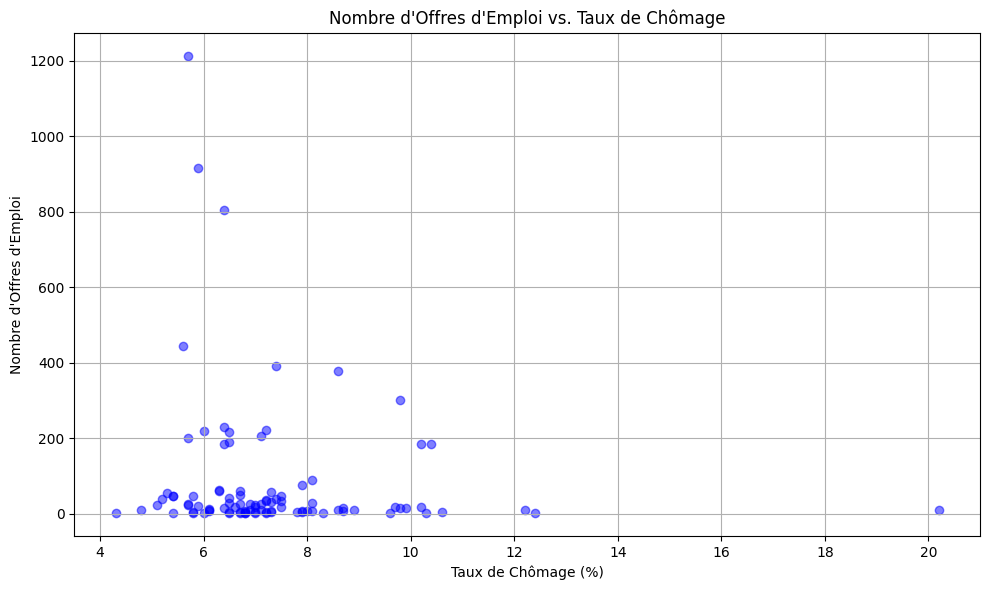

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['taux_chaumage'], df['nombre_offres'], color='blue', alpha=0.5)
plt.title('Nombre d\'Offres d\'Emploi vs. Taux de Chômage')
plt.xlabel('Taux de Chômage (%)')
plt.ylabel('Nombre d\'Offres d\'Emploi')
plt.grid(True)
plt.tight_layout()
plt.show()

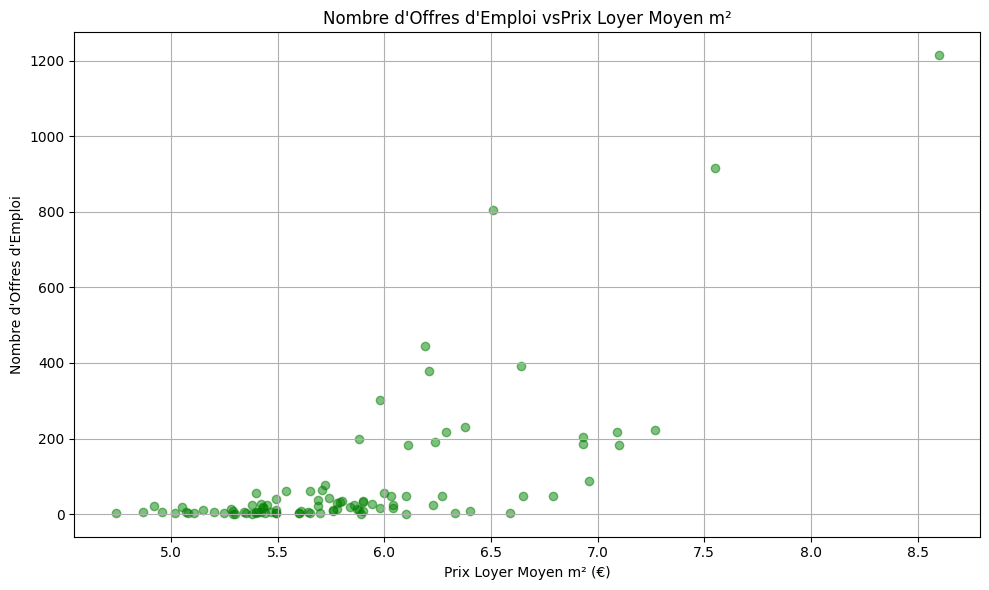

In [ ]:
# Scatter Plot: Nombre d'Offres d'Emploi vs (Prix Loyer Moyen m²)
plt.figure(figsize=(10, 6))
plt.scatter(df['prix_loyer_moyen_m2'], df['nombre_offres'], color='green', alpha=0.5)
plt.title('Nombre d\'Offres d\'Emploi vsPrix Loyer Moyen m²')
plt.xlabel('Prix Loyer Moyen m² (€)')
plt.ylabel('Nombre d\'Offres d\'Emploi')
plt.grid(True)
plt.tight_layout()
plt.show()

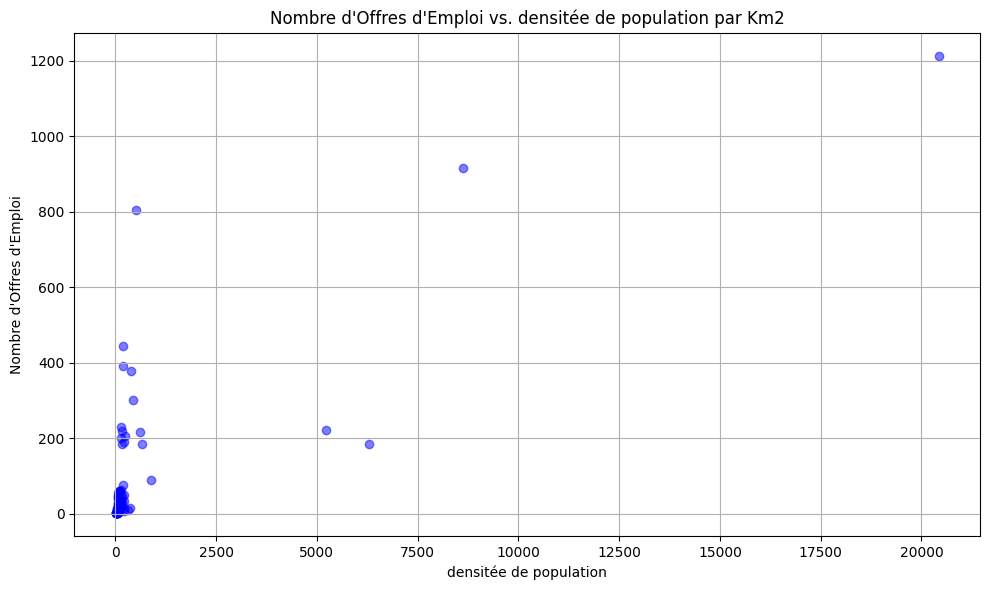

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['densite_pop'], df['nombre_offres'], color='blue', alpha=0.5)
plt.title('Nombre d\'Offres d\'Emploi vs. densitée de population par Km2')
plt.xlabel('densitée de population')
plt.ylabel('Nombre d\'Offres d\'Emploi')
plt.grid(True)
plt.tight_layout()
plt.show()

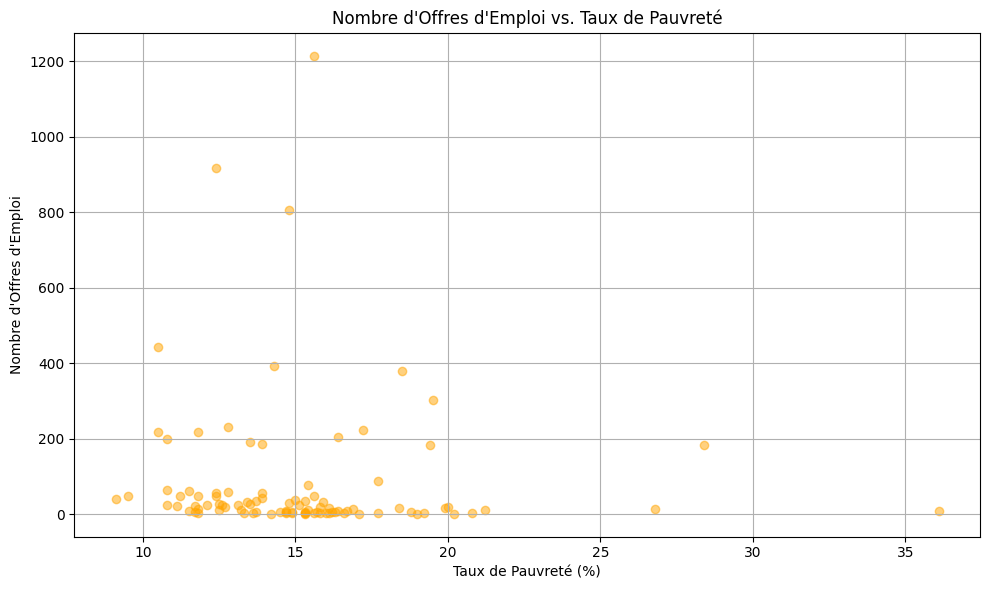

In [ ]:
# Scatter Plot: Nombre d'Offres d'Emploi vs. Taux de Pauvreté
plt.figure(figsize=(10, 6))
plt.scatter(df['taux_pauvrete'], df['nombre_offres'], color='orange', alpha=0.5)
plt.title('Nombre d\'Offres d\'Emploi vs. Taux de Pauvreté')
plt.xlabel('Taux de Pauvreté (%)')
plt.ylabel('Nombre d\'Offres d\'Emploi')
plt.grid(True)
plt.tight_layout()
plt.show()

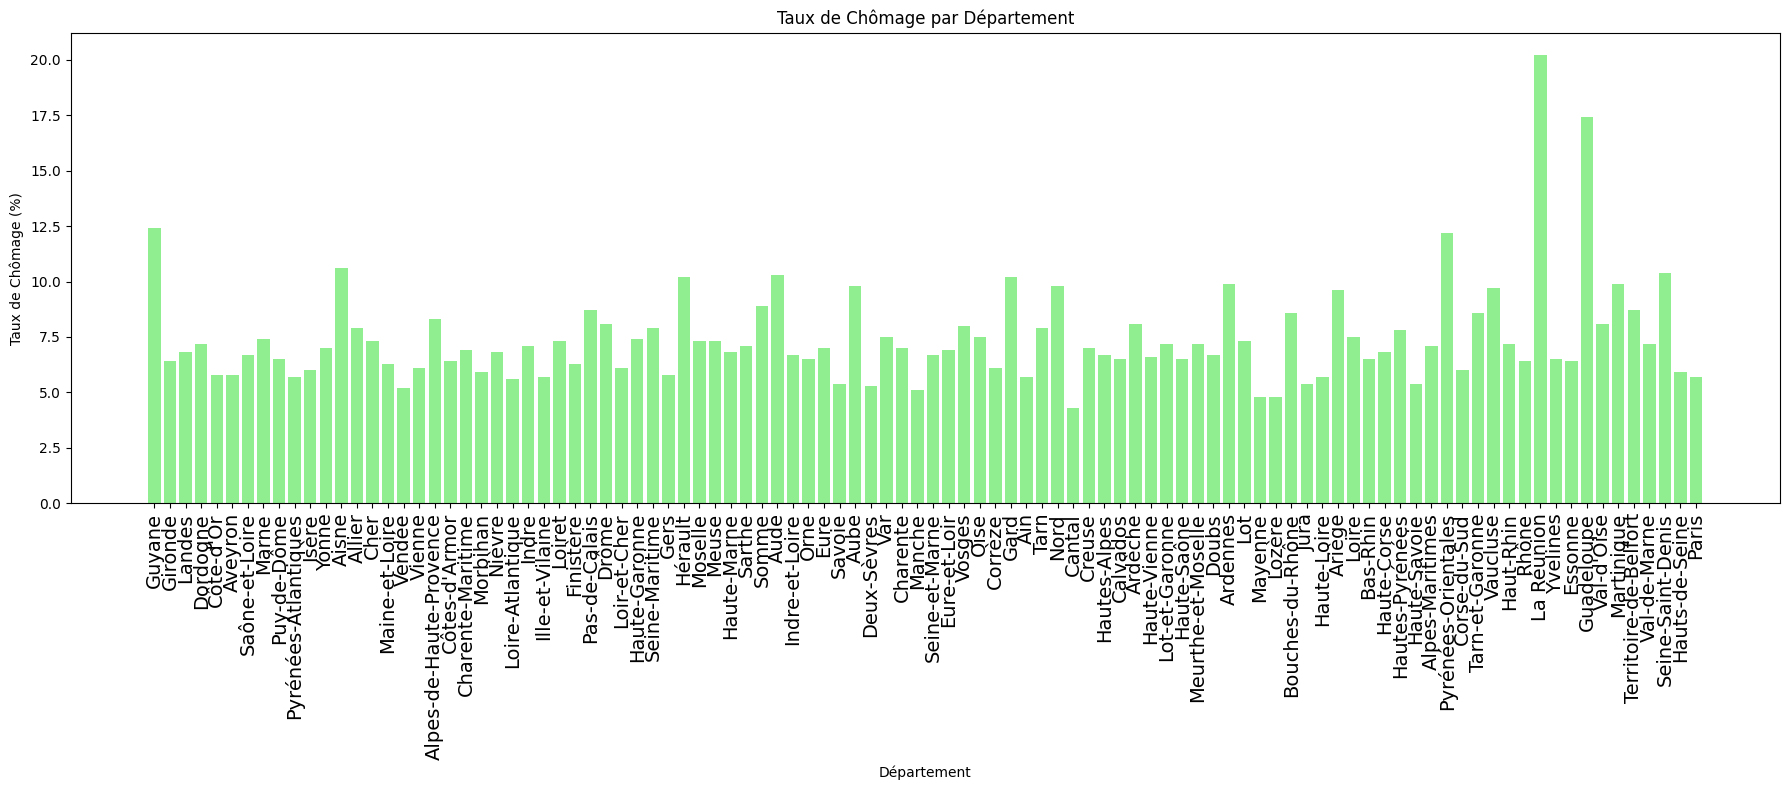

In [ ]:
import matplotlib.pyplot as plt
df = df_merged

# Taux de Chômage
plt.figure(figsize=(18,8))
plt.bar(df['departement'], df['taux_chaumage'], color='lightgreen')
plt.title('Taux de Chômage par Département')
plt.xlabel('Département')
plt.ylabel('Taux de Chômage (%)')
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

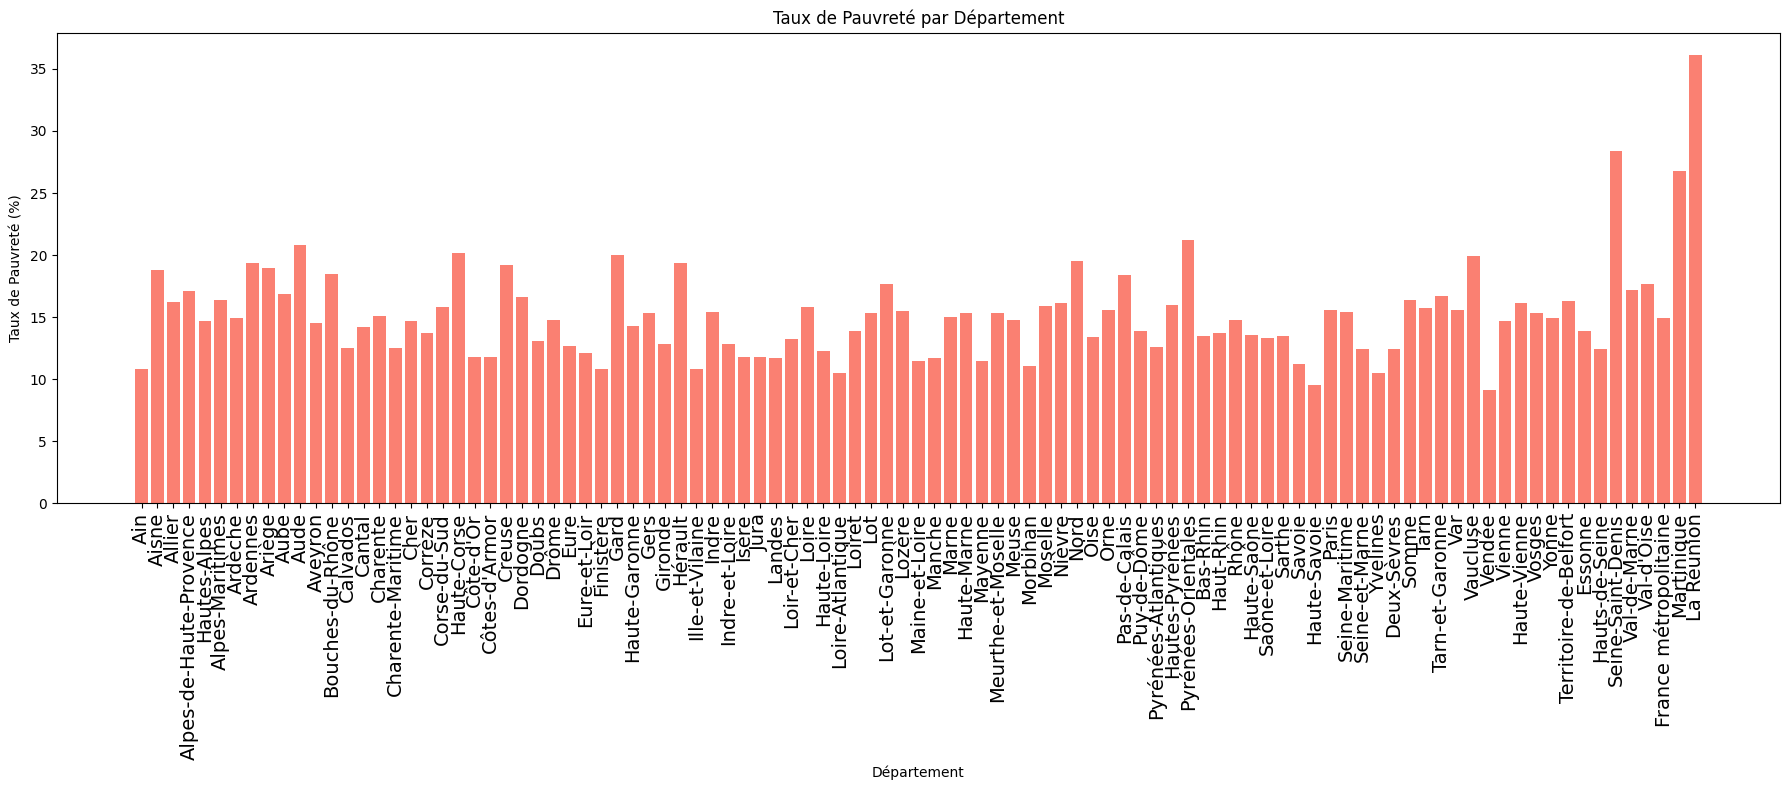

In [ ]:
# Taux de Pauvreté
plt.figure(figsize=(18, 8))
plt.bar(df_pauvrete['departement'], df_pauvrete['taux_pauvrete'], color='salmon')
plt.title('Taux de Pauvreté par Département')
plt.xlabel('Département')
plt.ylabel('Taux de Pauvreté (%)')
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

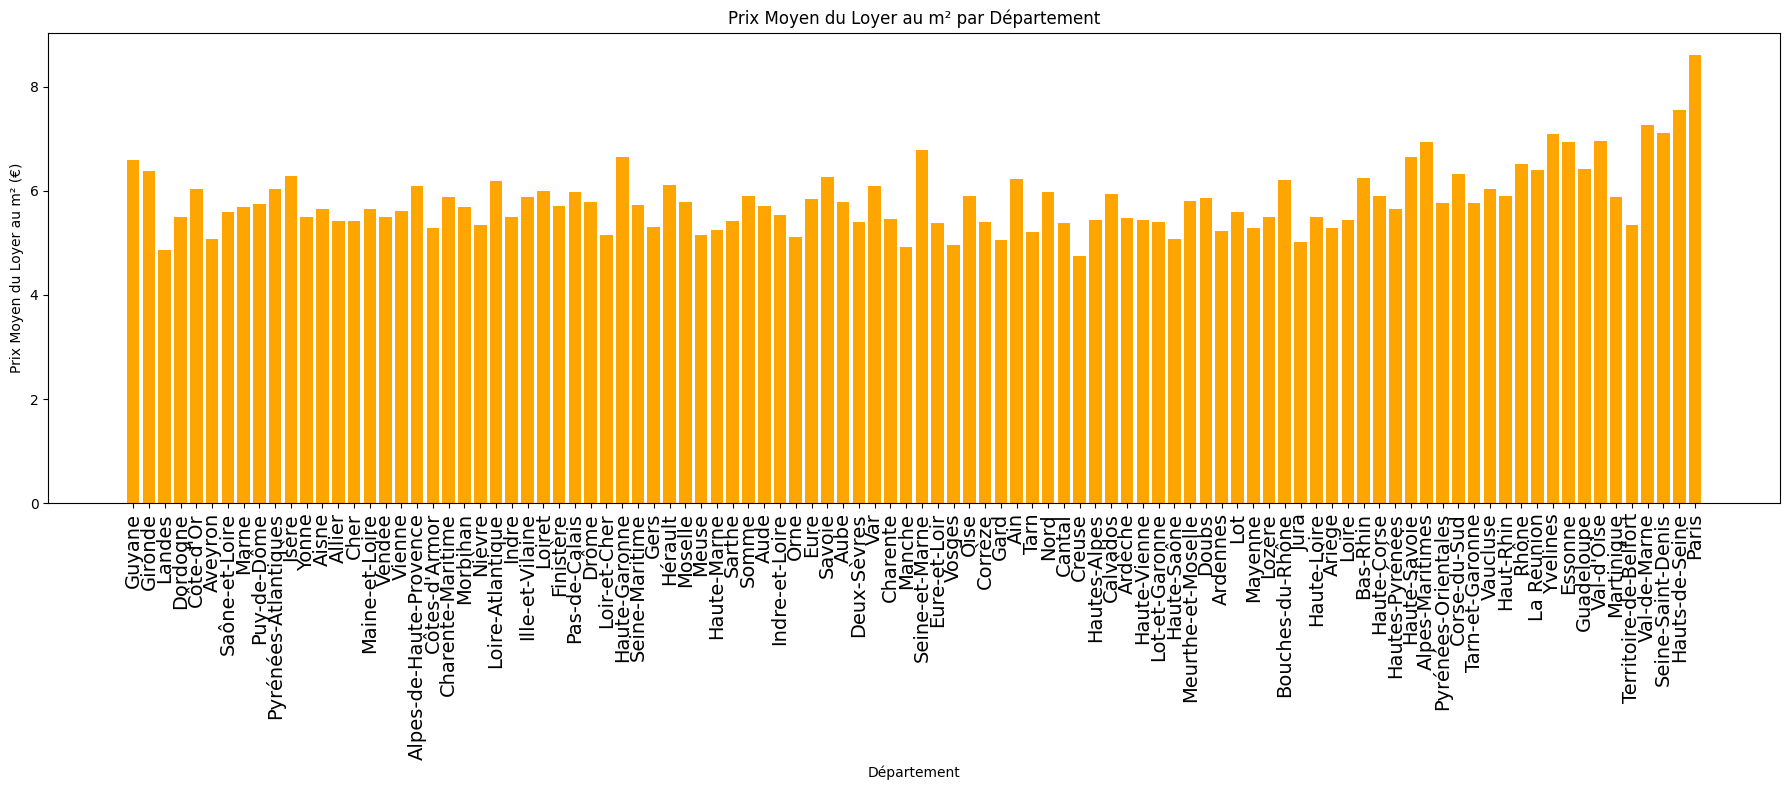

In [ ]:



# Prix Moyen du Loyer au m²
plt.figure(figsize=(18, 8))
plt.bar(df['departement'], df['prix_loyer_moyen_m2'], color='orange')
plt.title('Prix Moyen du Loyer au m² par Département')
plt.xlabel('Département')
plt.ylabel('Prix Moyen du Loyer au m² (€)')
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

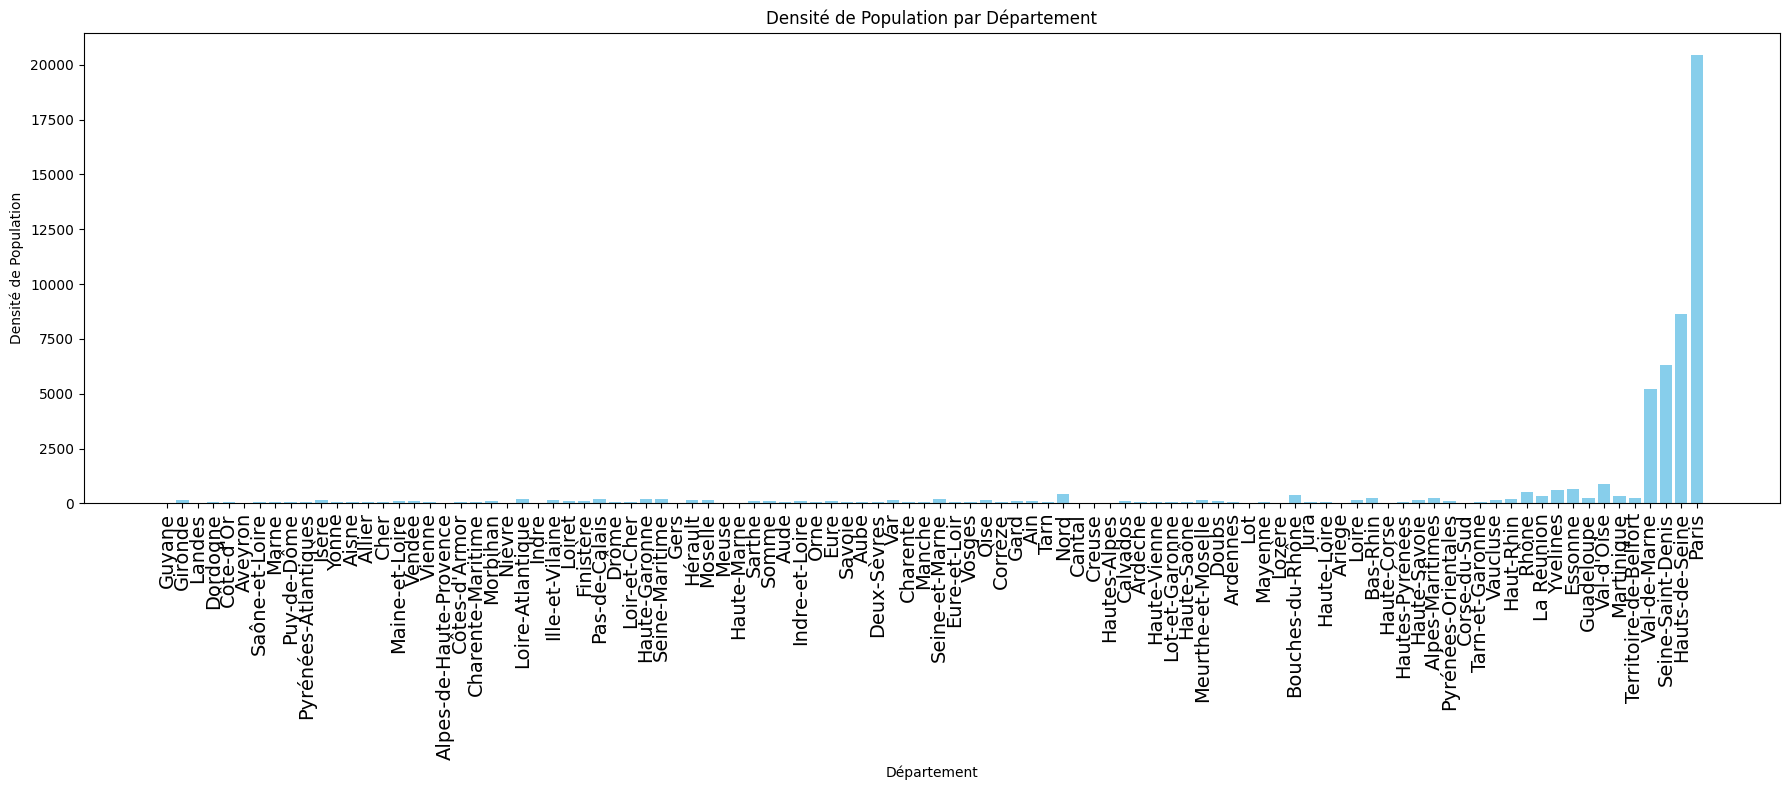

In [ ]:
# Densité de Population
plt.figure(figsize=(18, 8))
plt.bar(df['departement'], df['densite_pop'], color='skyblue')
plt.title('Densité de Population par Département')
plt.xlabel('Département')
plt.ylabel('Densité de Population')
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()